Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
# create a line plot
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_theme(style='darkgrid', palette='viridis')
import warnings
warnings.filterwarnings('ignore')

In [2]:
series = pd.read_excel('Airlines_Data.xlsx')
series.info()
series.describe()

series

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
series.isna().sum()
series.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


From the above there are no null values , descriptive analysis we can see MEan and median is approximately equal so it seems to be a normal distribution and if we look at 5 point summary we cannot see any outliers but we will confirm with the visualisation techniques.

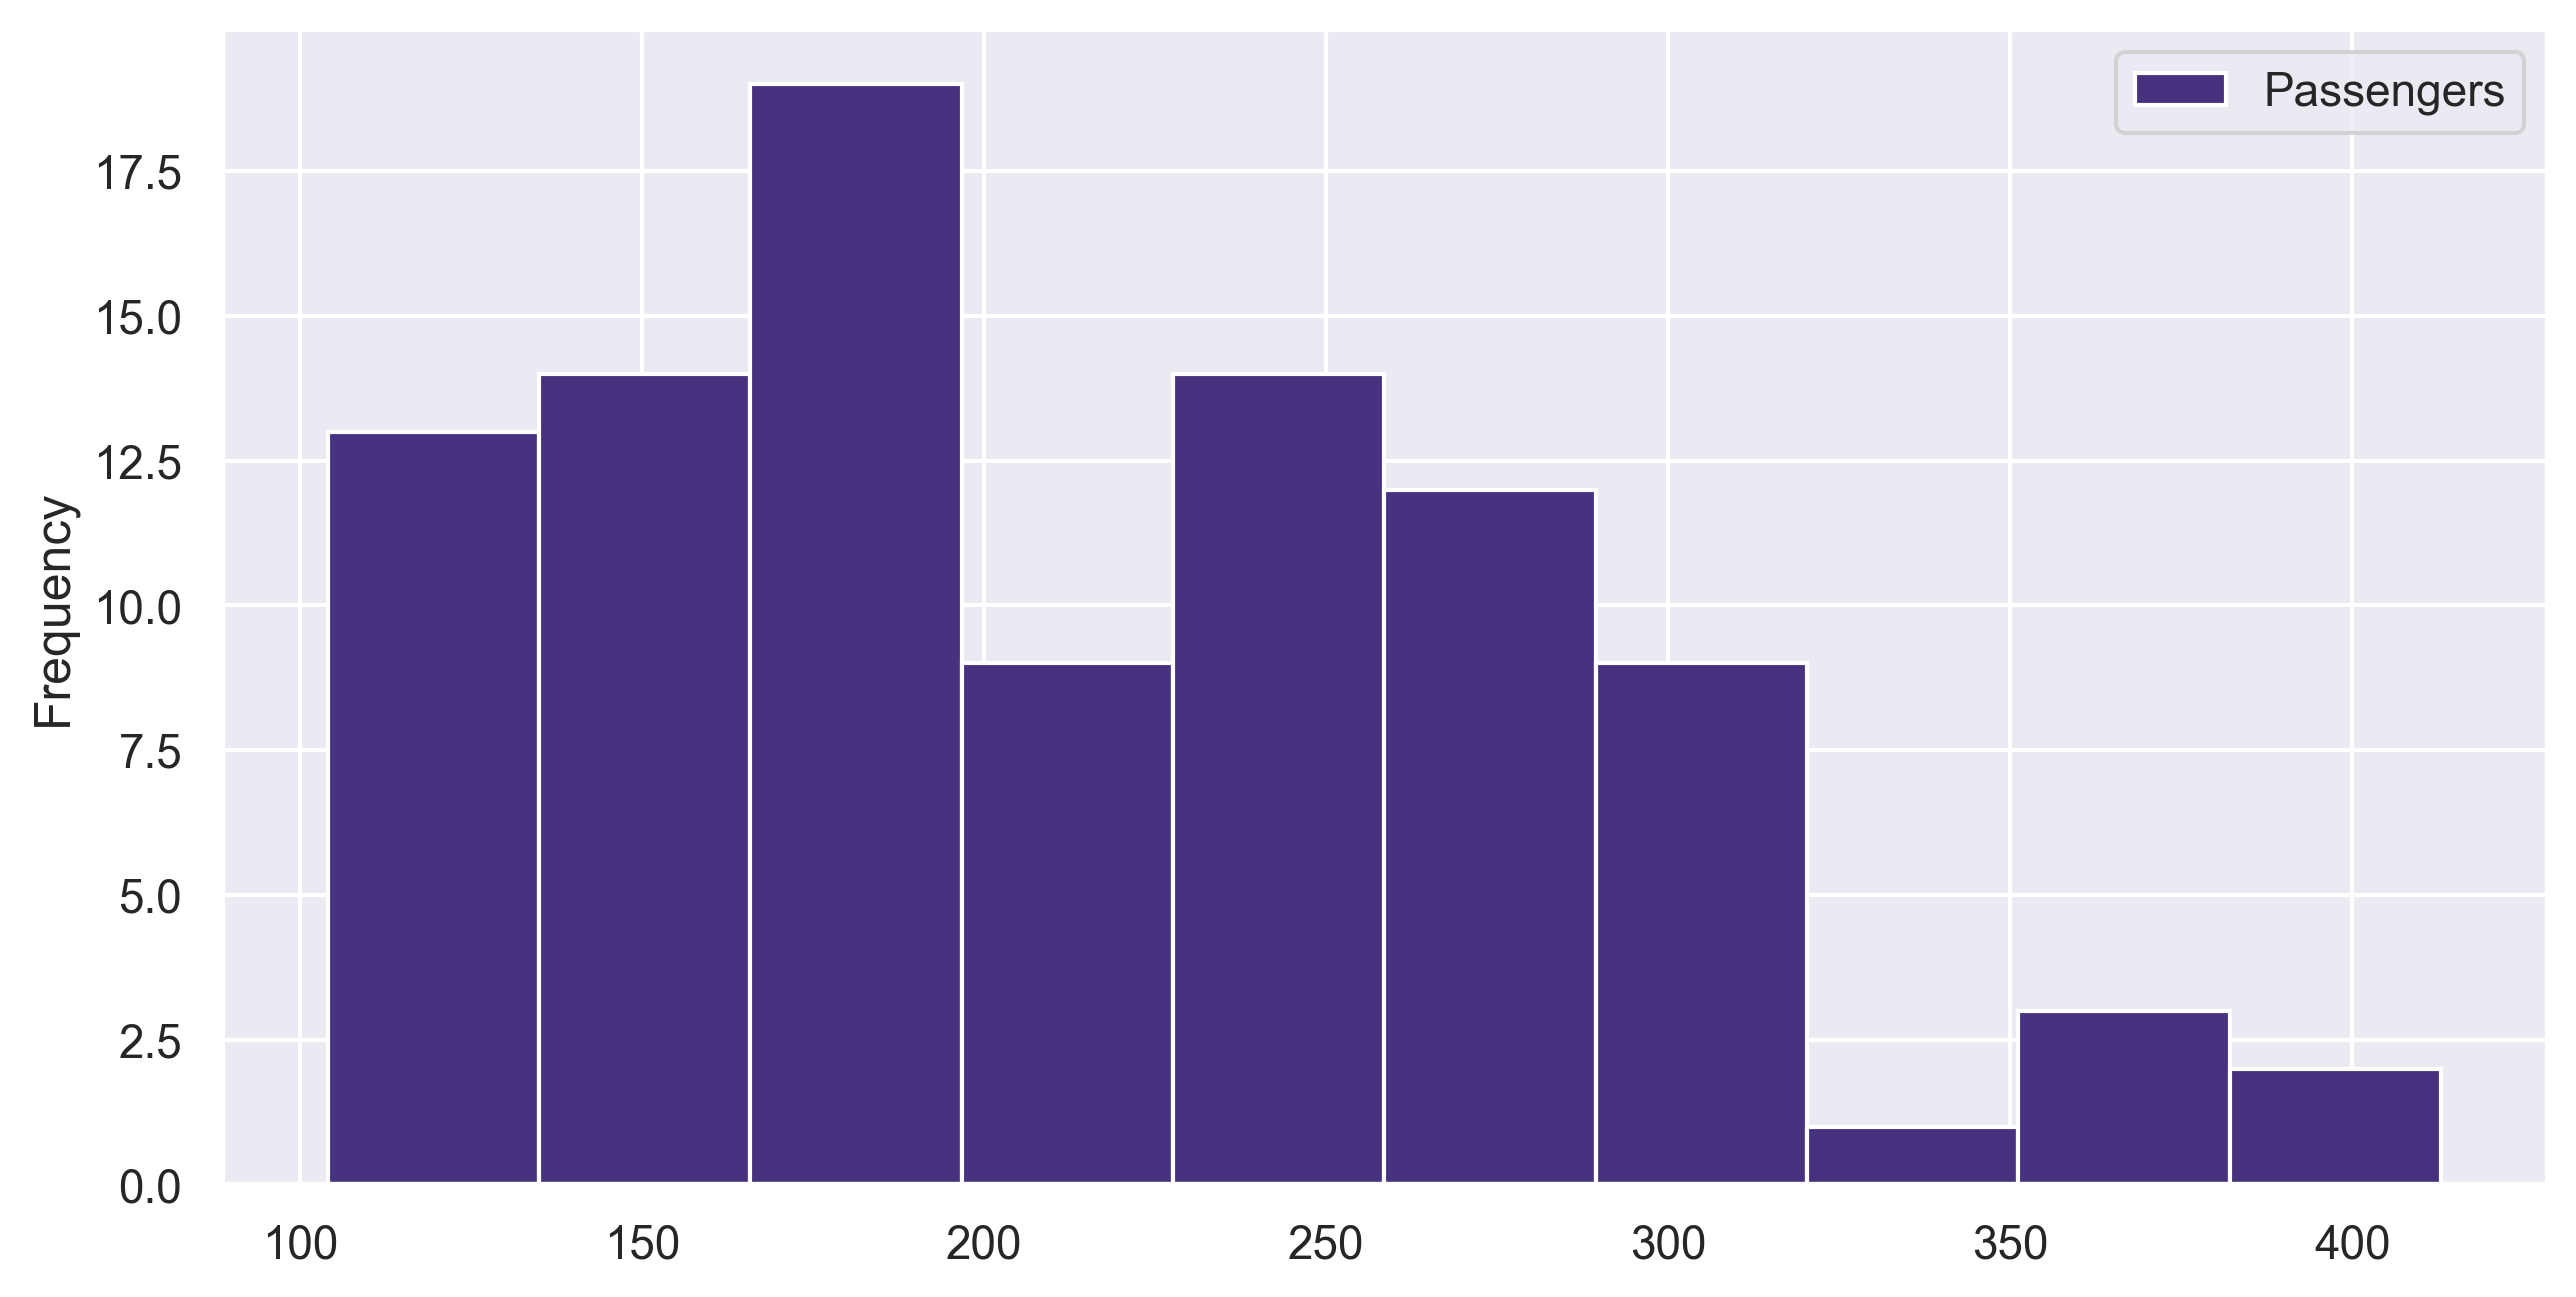

In [4]:
series.plot(kind='hist')
plt.show()

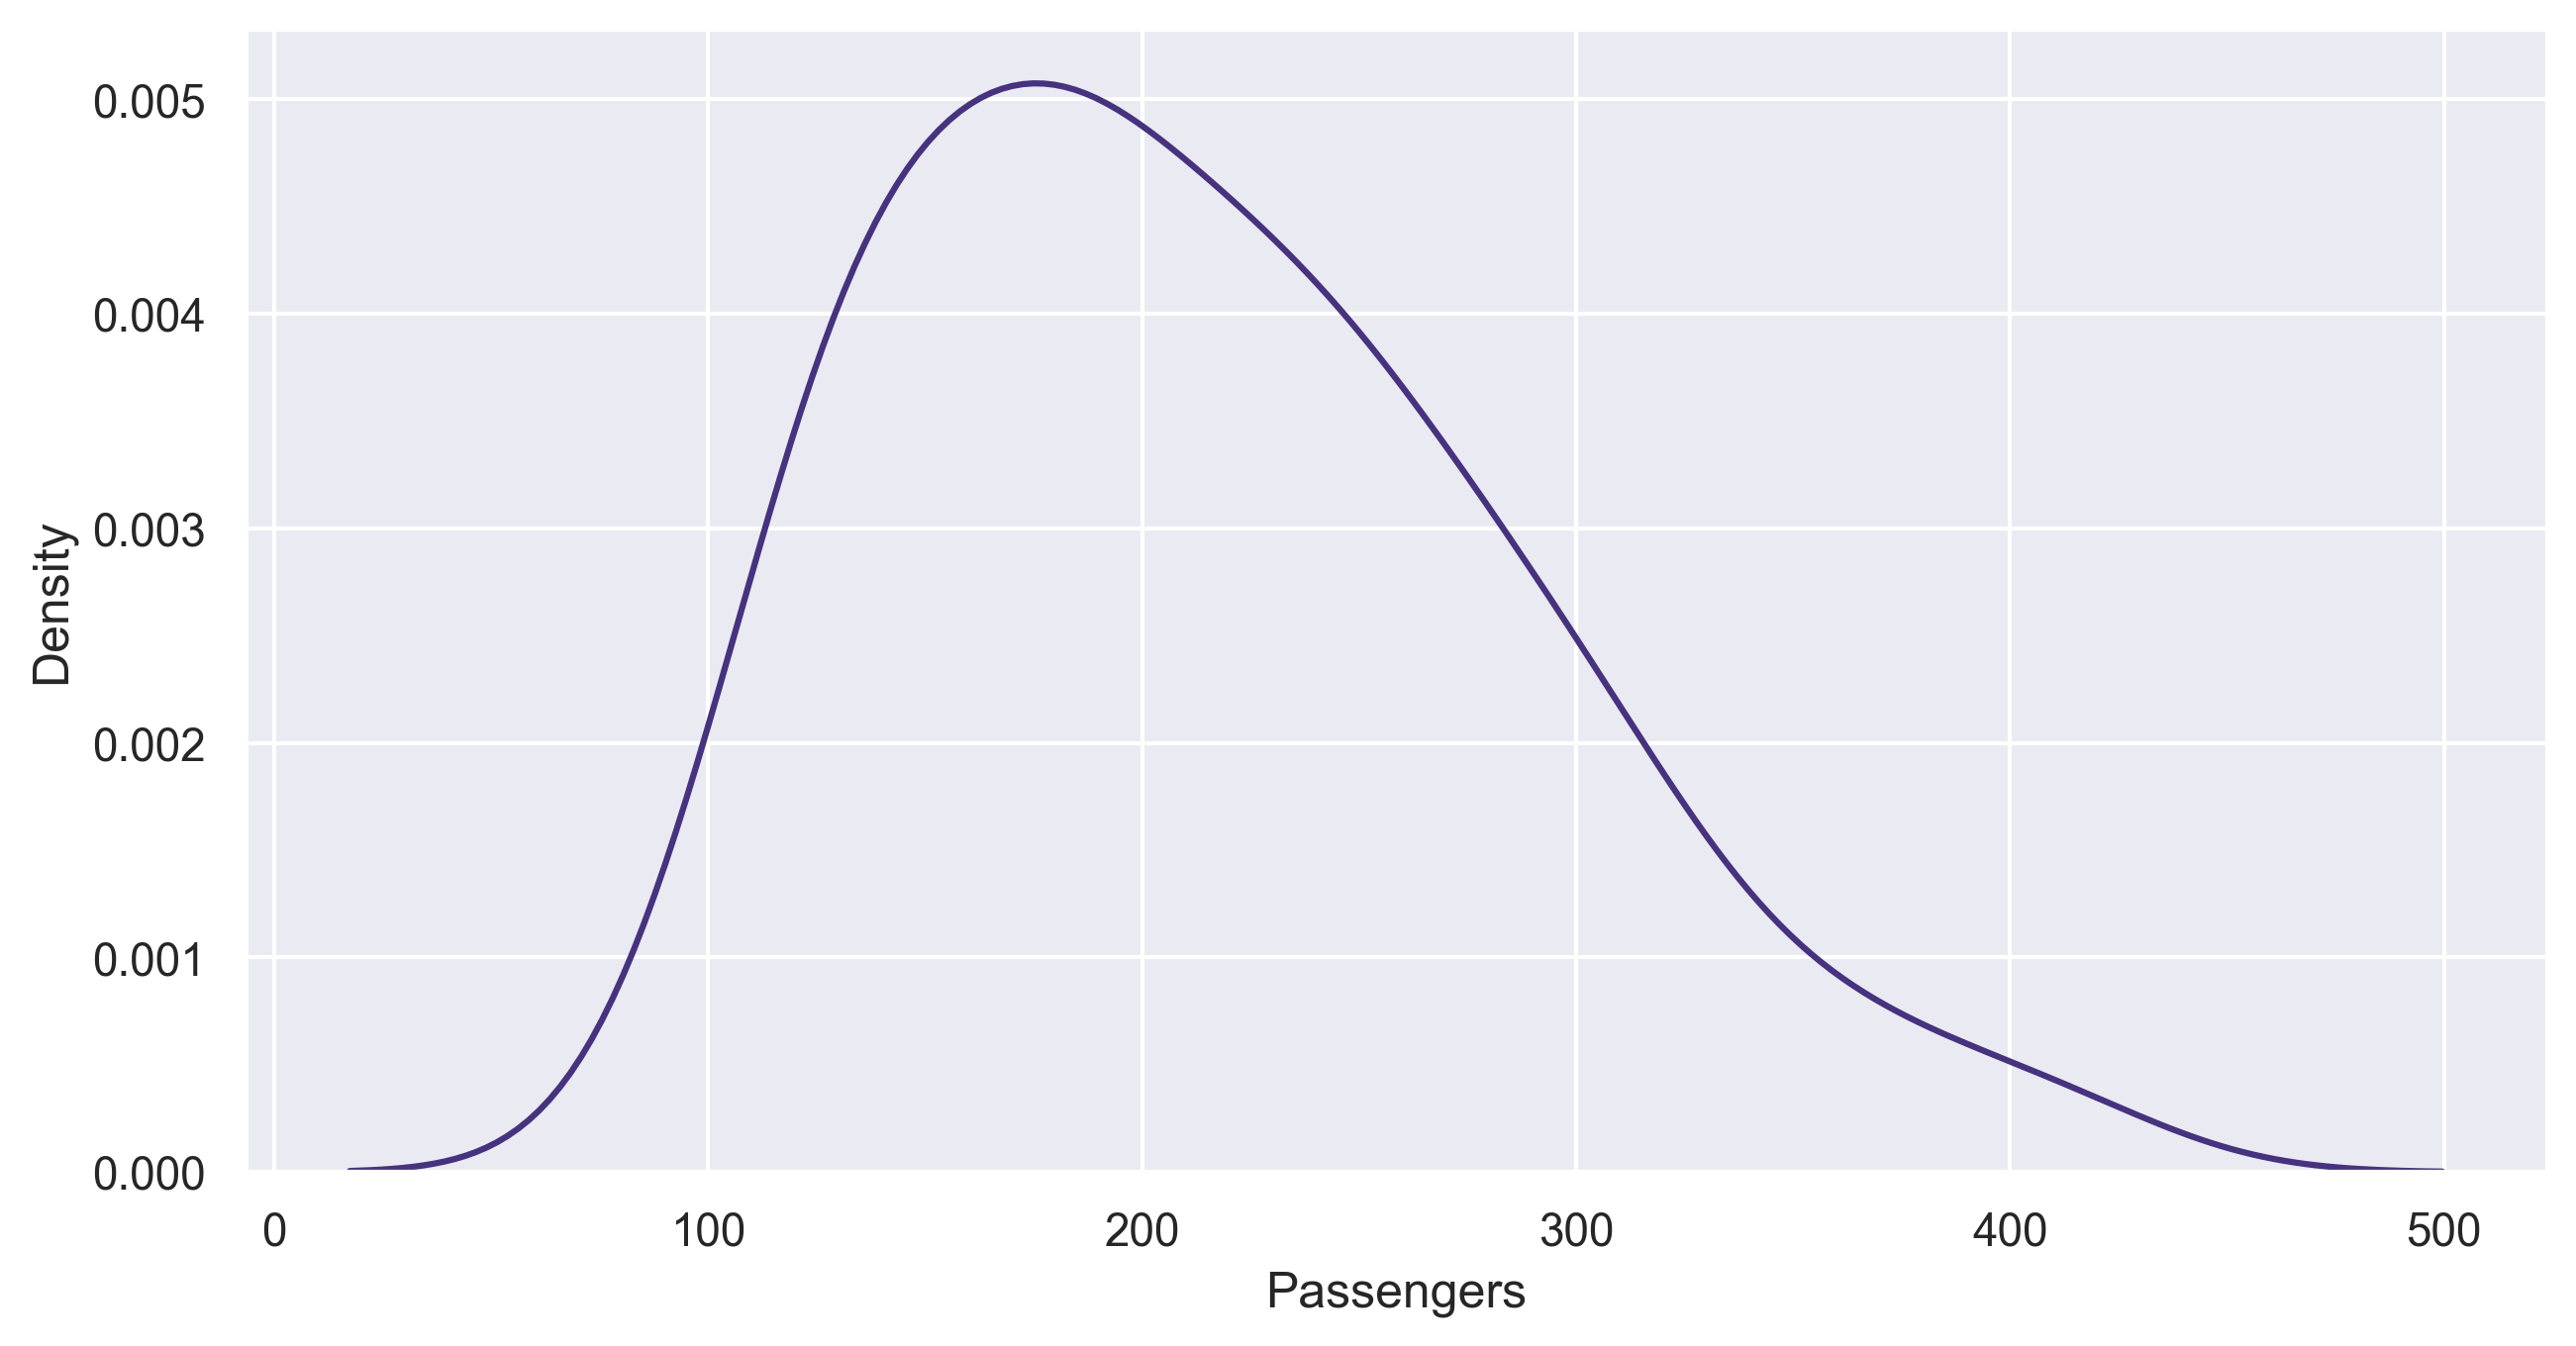

In [5]:
sns.kdeplot(series['Passengers']) 
plt.show()

<Axes: >

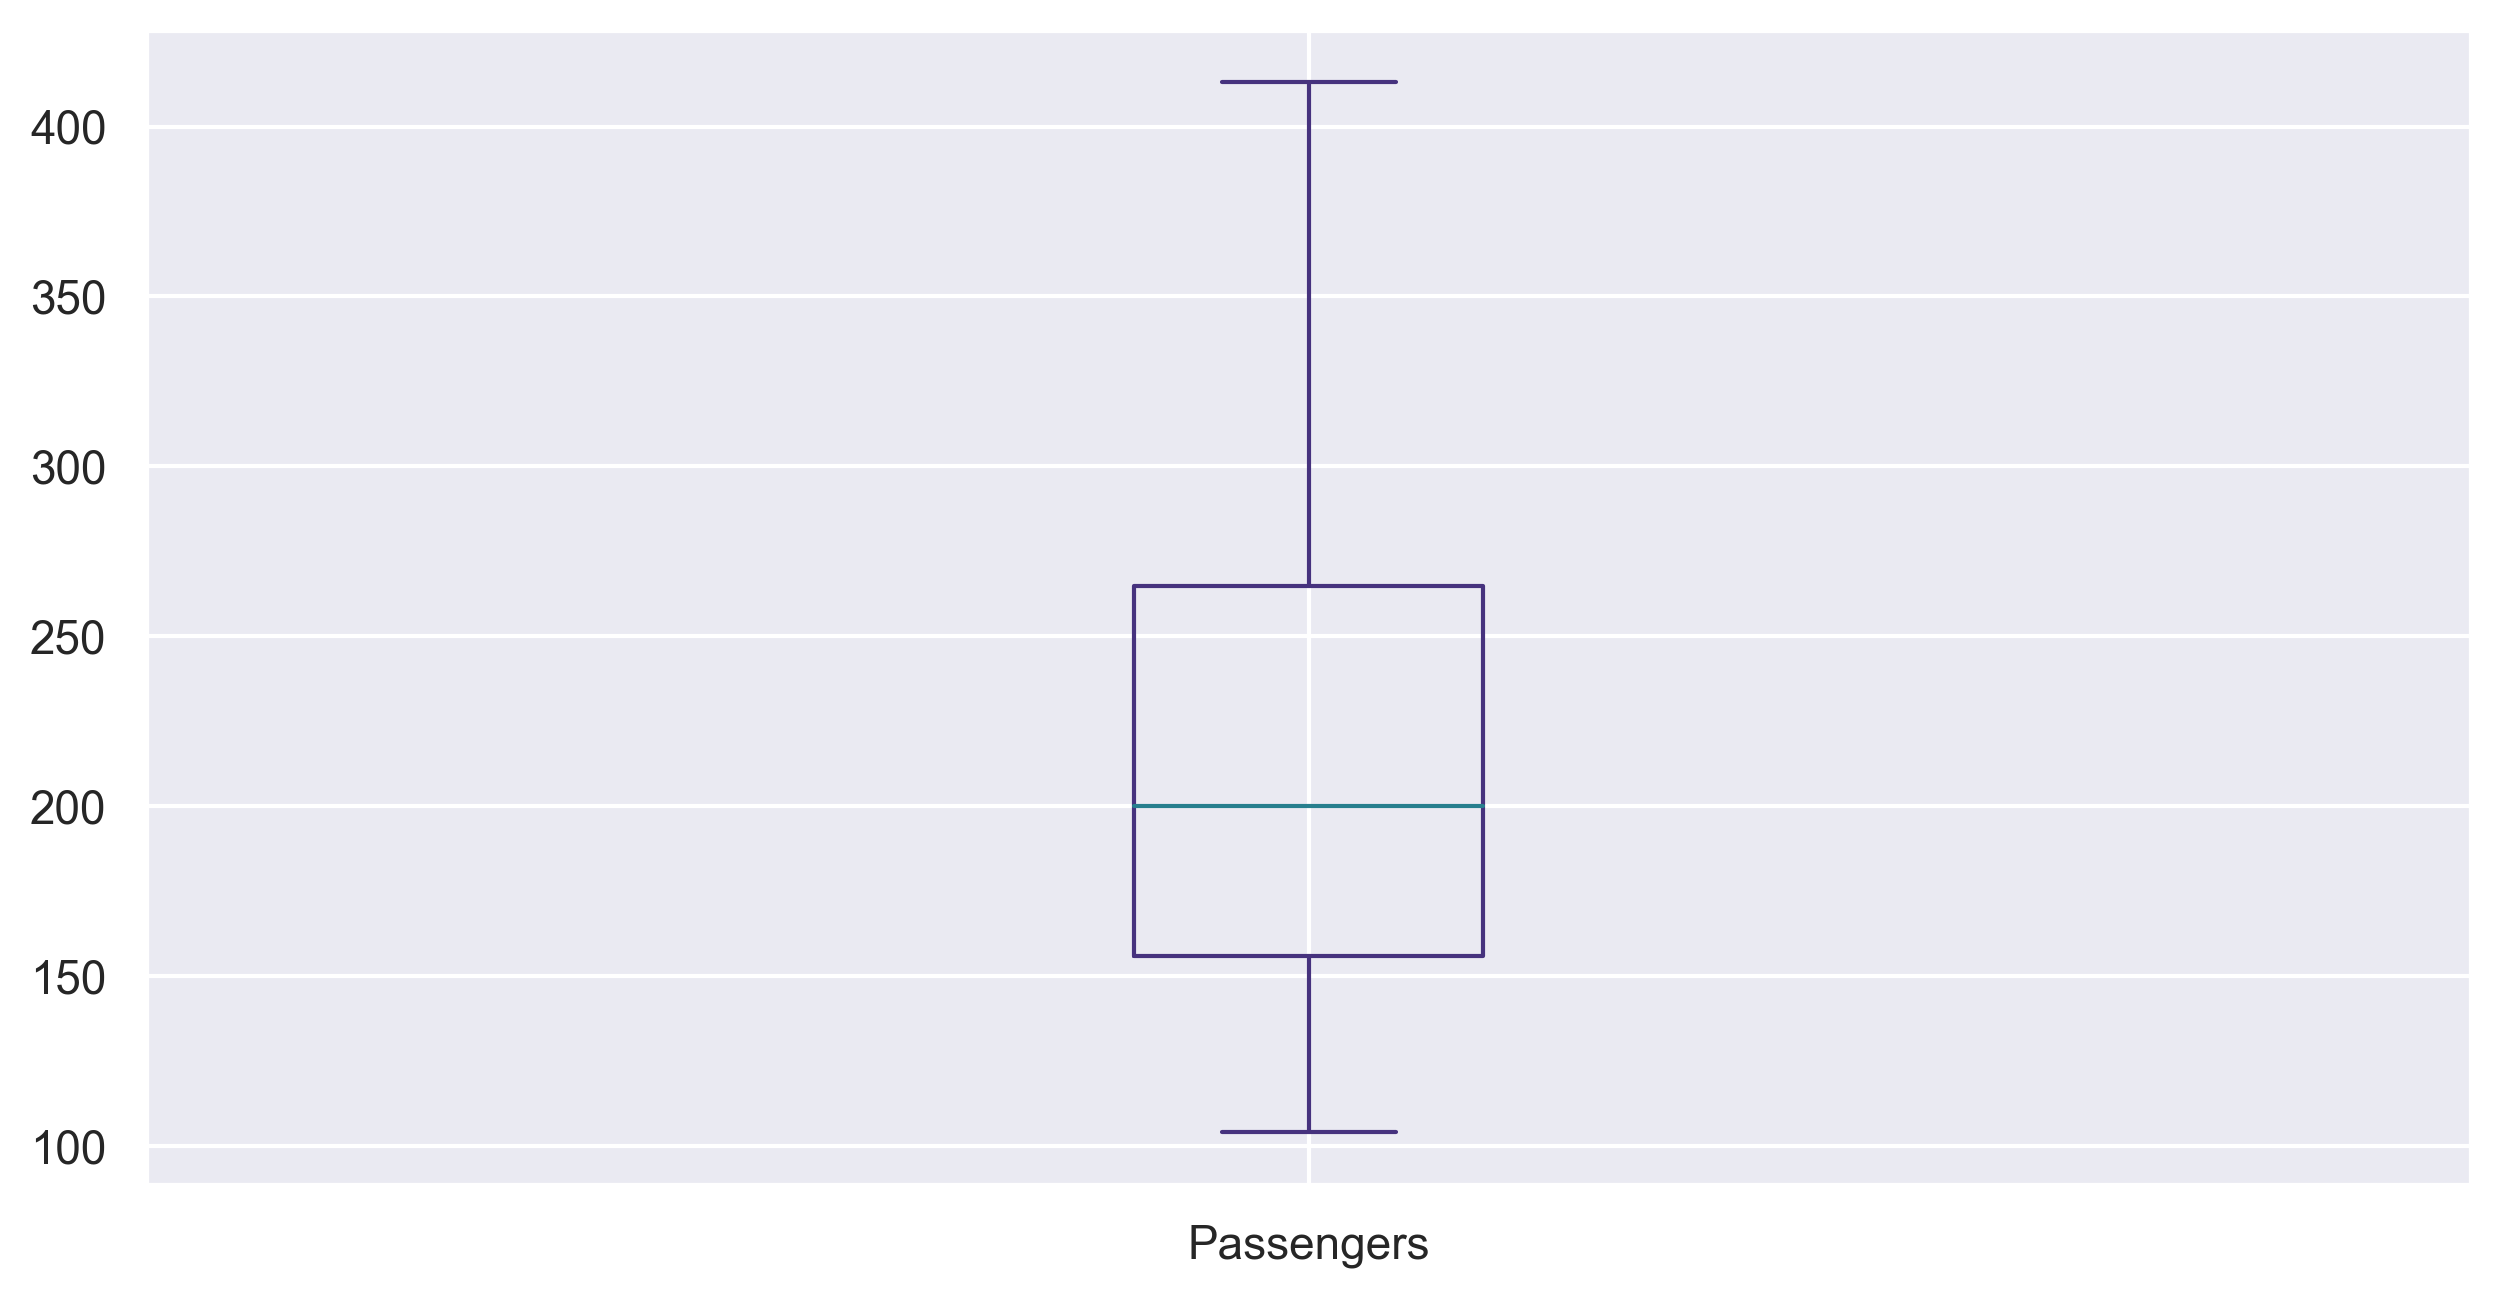

In [6]:
series.plot(kind="box")

As per the above visualualisation techniques we have confirmed that we are right wrt our descriptive analysis passengers data follows a normal distribution. It doesnot contain any outliers hence no treatment is needed.

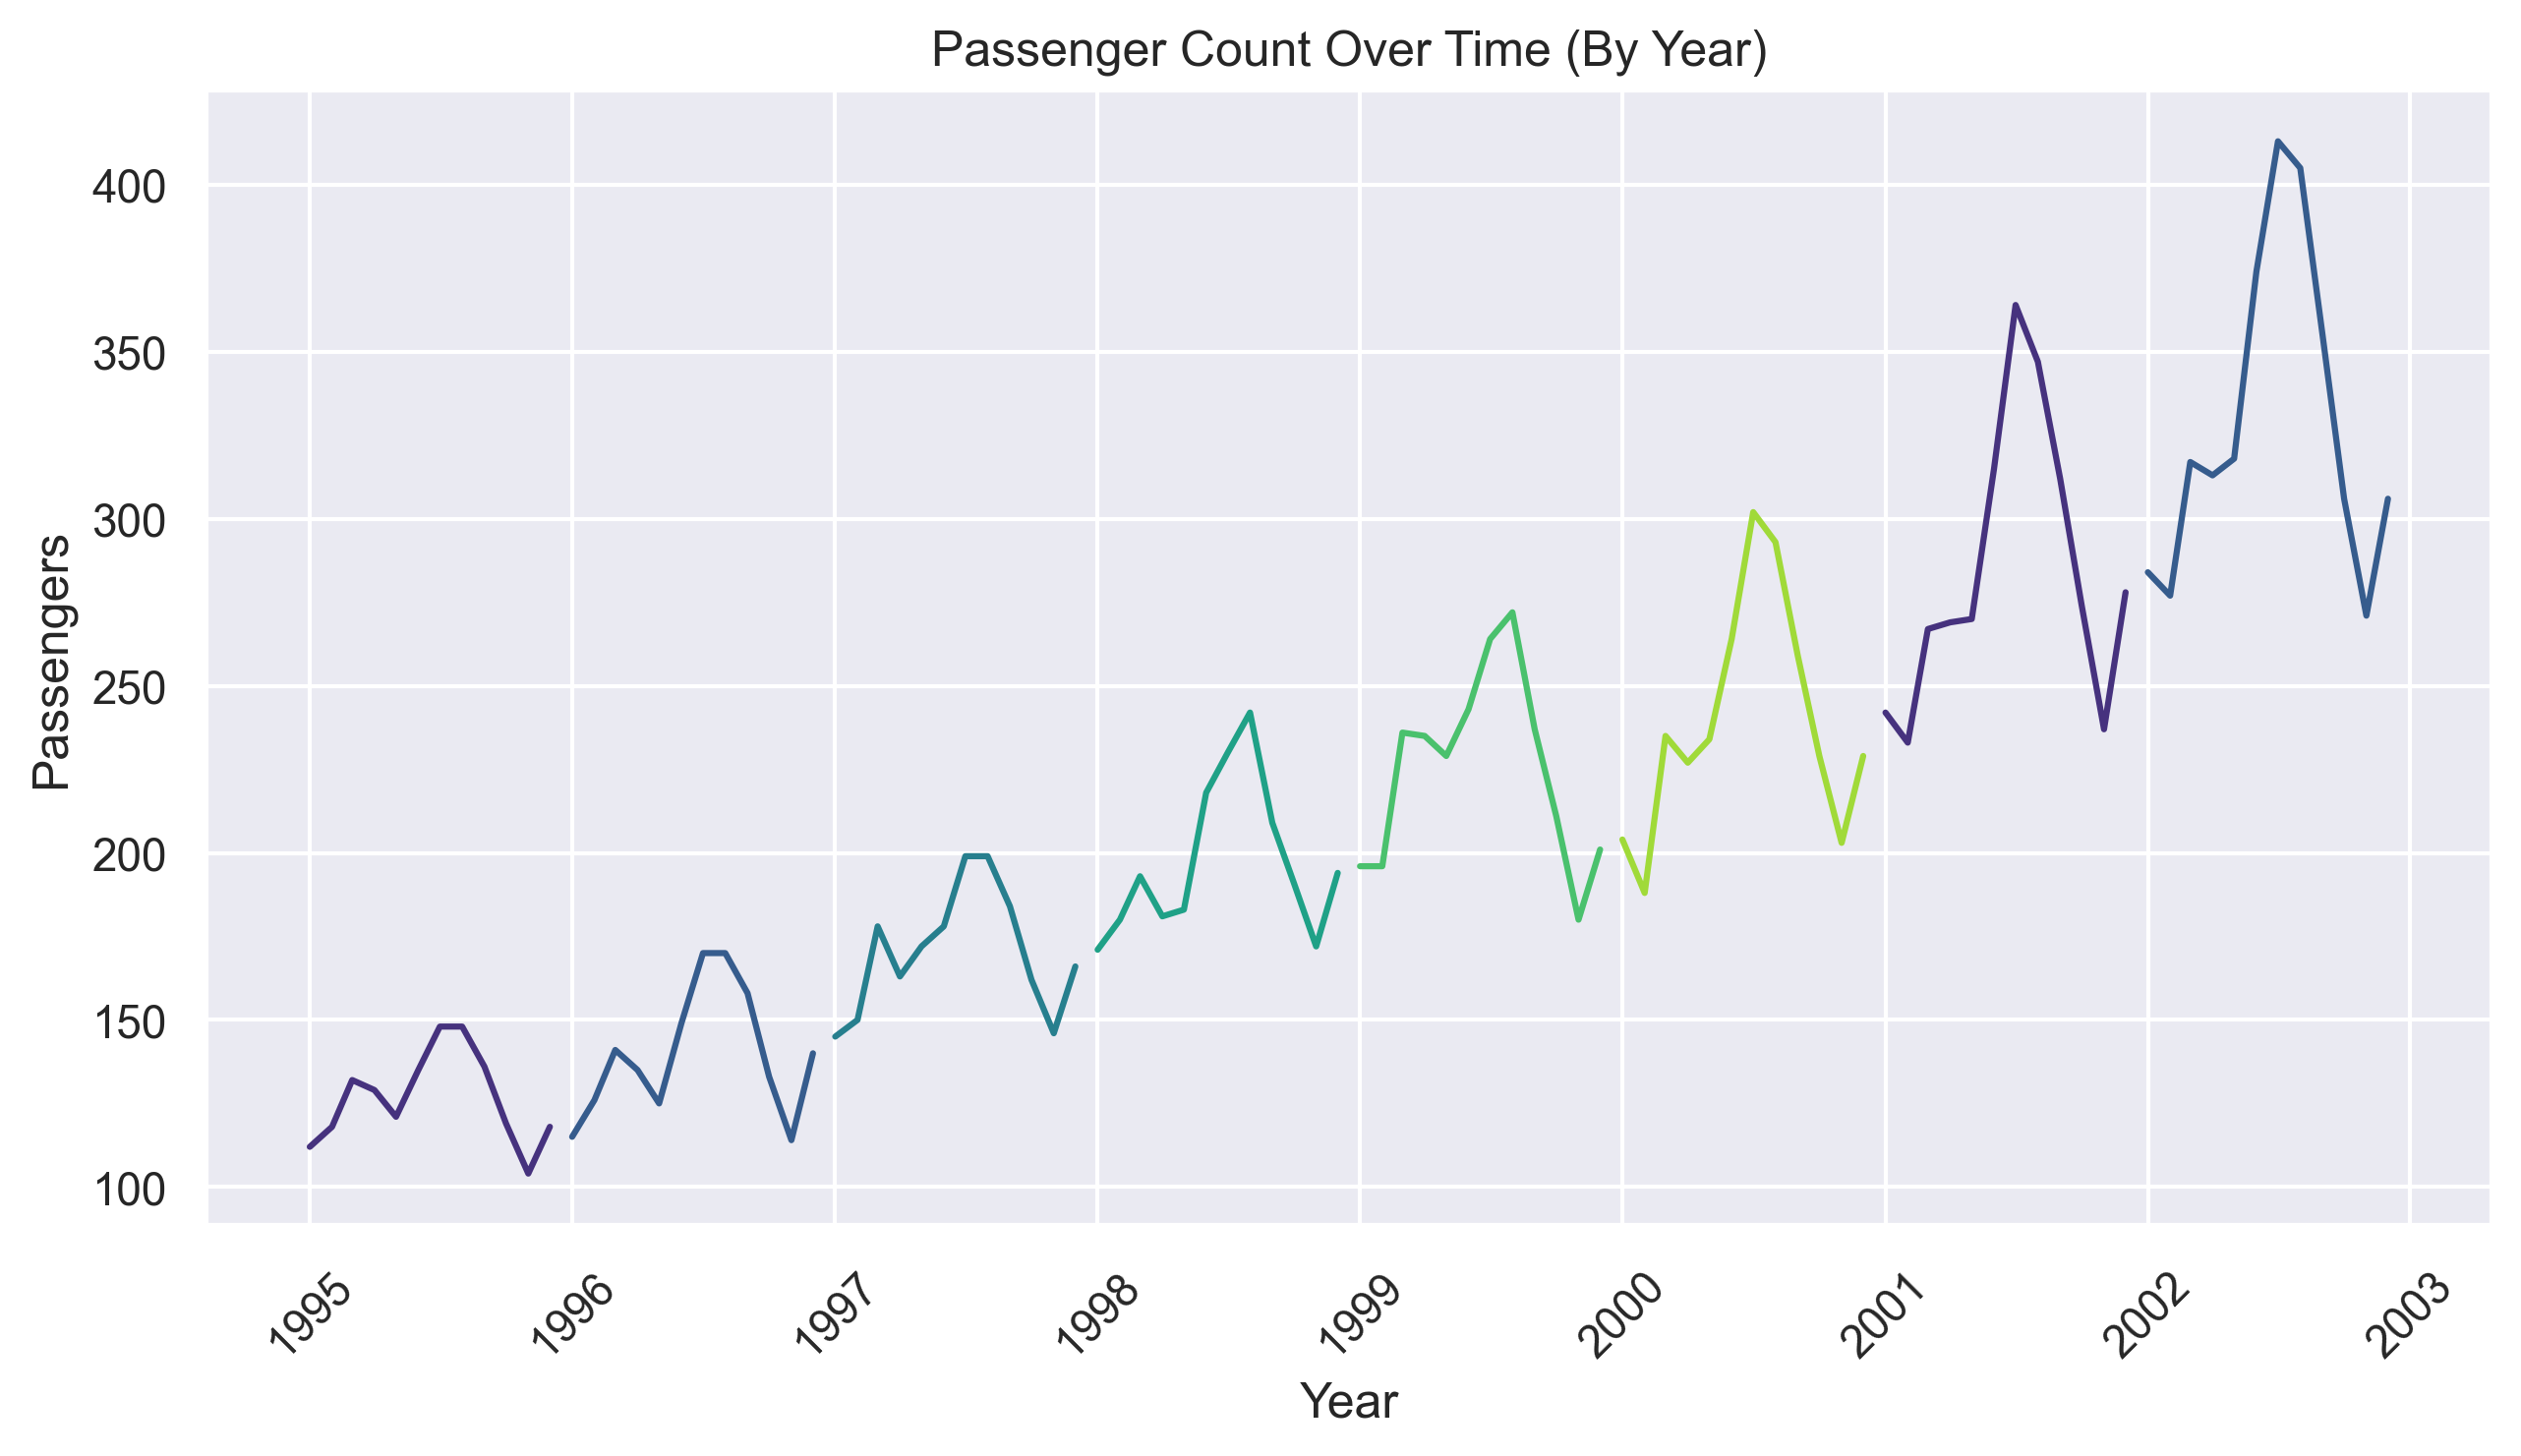

In [7]:
# Group the data by year

yearly_data = {}
for index, row in series.iterrows():
    year = row['Month'].year
    if year not in yearly_data:
        yearly_data[year] = {'months': [row['Month']], 'passengers': [row['Passengers']]}
    else:
        yearly_data[year]['months'].append(row['Month'])
        yearly_data[year]['passengers'].append(row['Passengers'])

# Plotting the data for each year
for year, data in yearly_data.items():
    plt.plot(data['months'], data['passengers'], label=str(year))

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Passenger Count Over Time (By Year)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Passenger Count Over Time (By Year)')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

(96, 2)

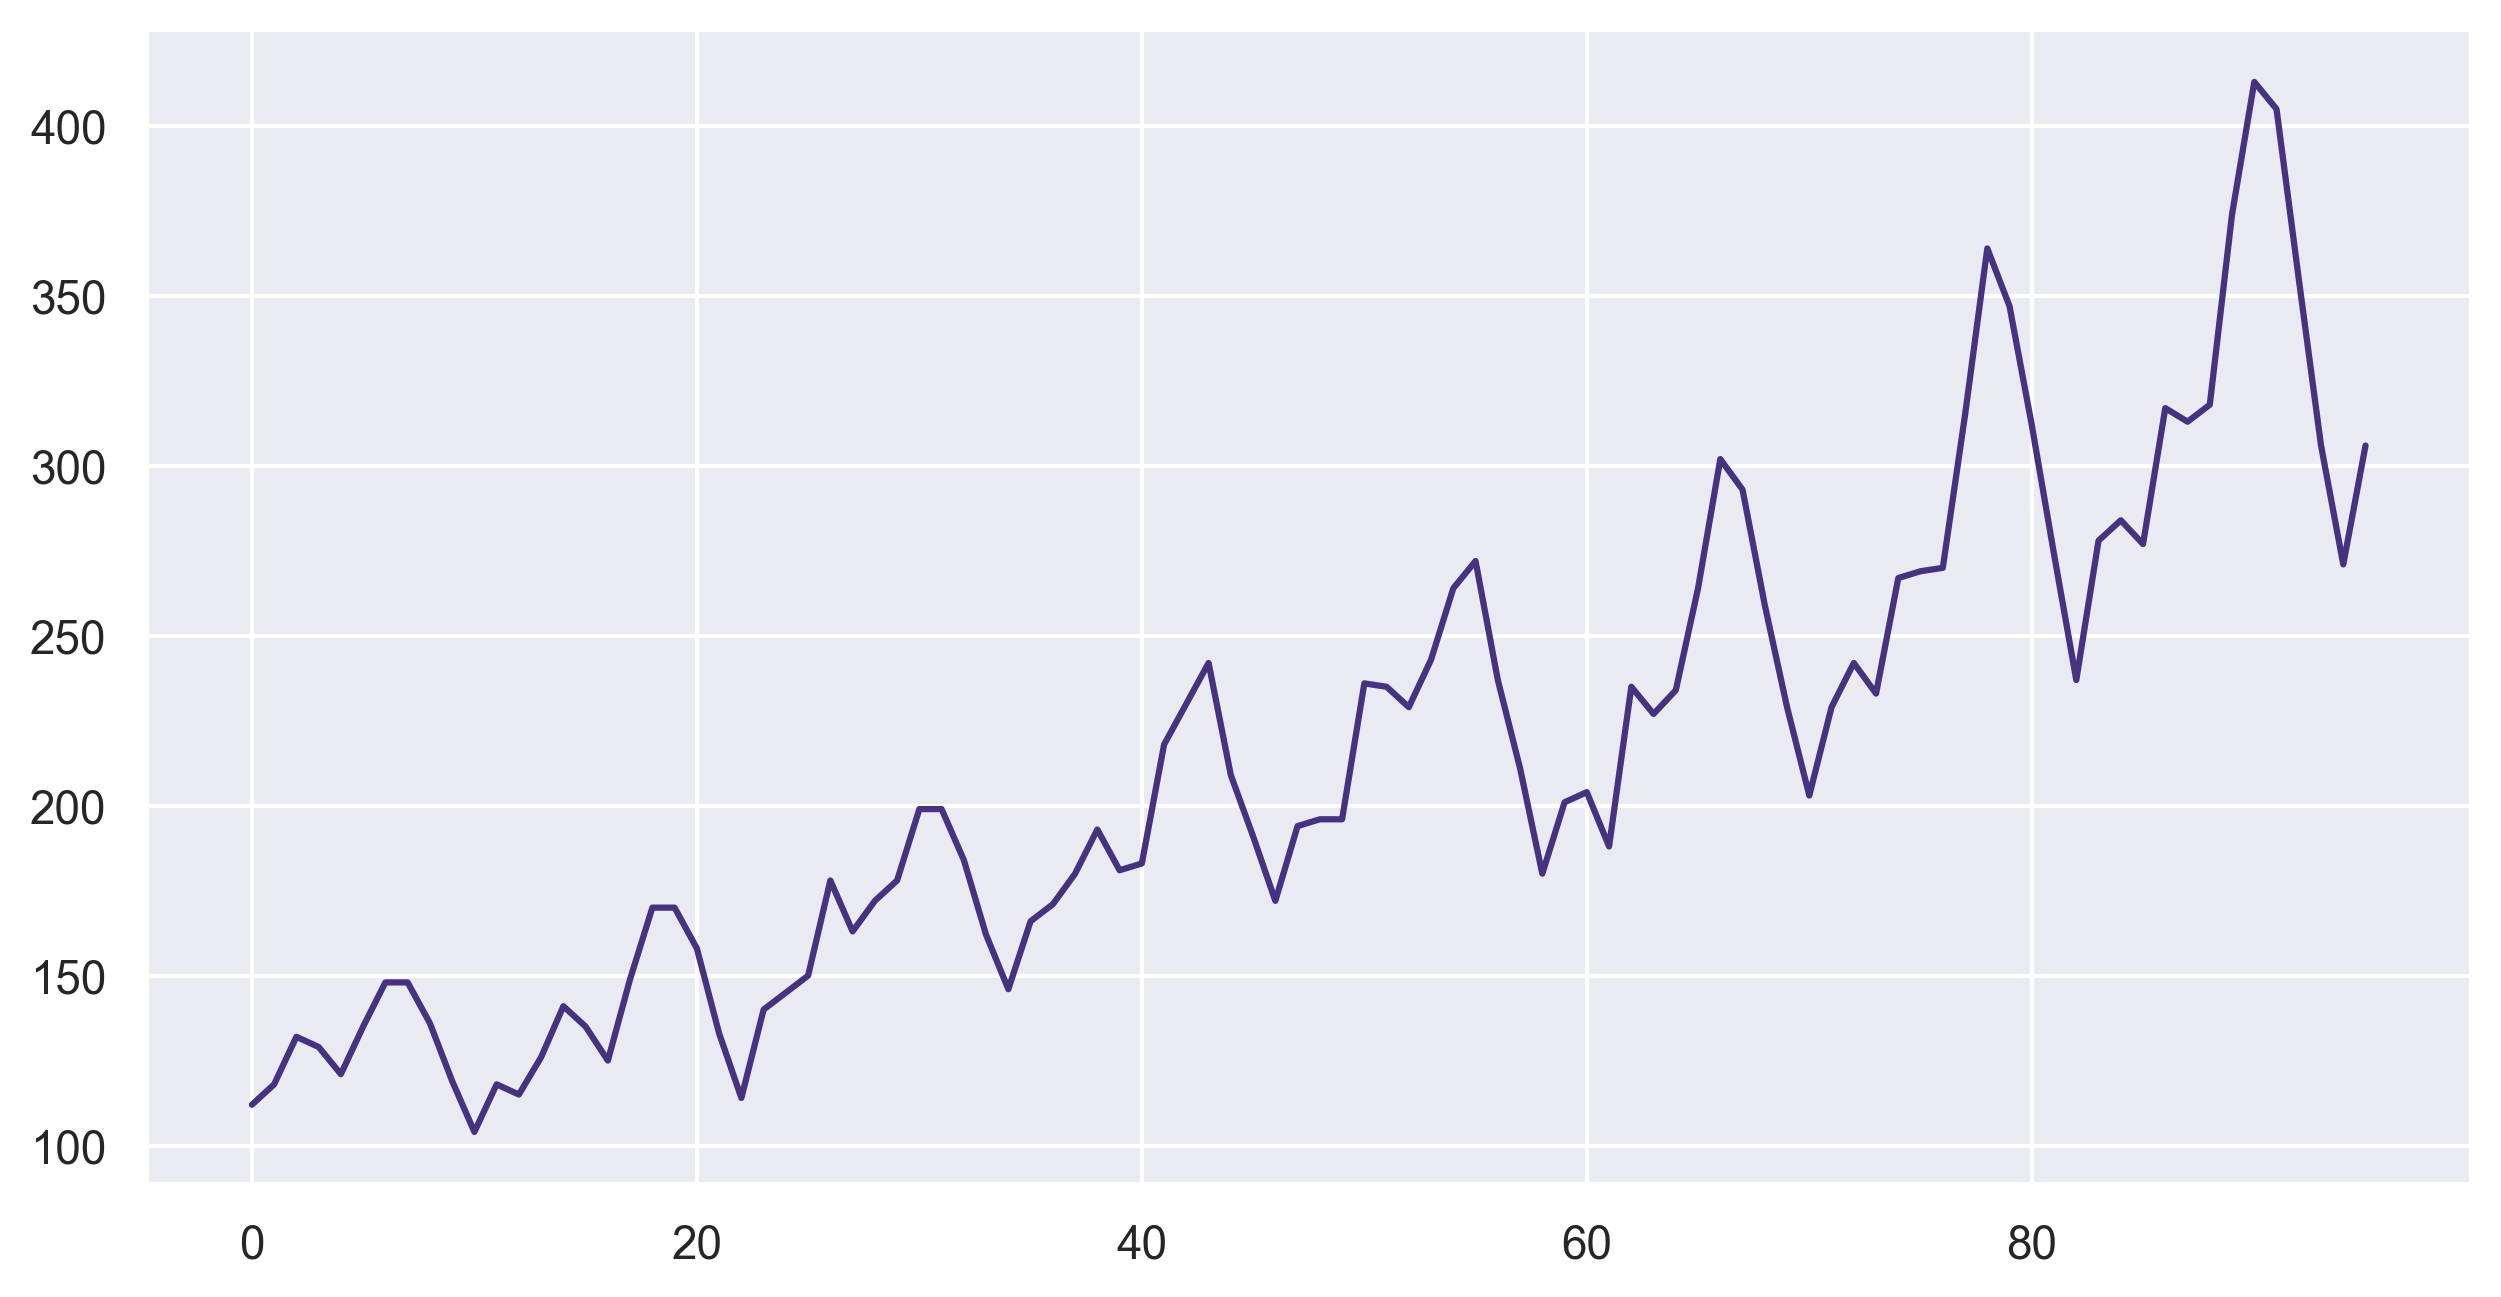

In [8]:
series.Passengers.plot()
series.shape

Here from the line plot of pur time series data we can see that no data for any year is missing.
This seems to be linear Trend with a multiplicative seasonality.Just in case I want to analyse the monthly data as well to check for data sanity.

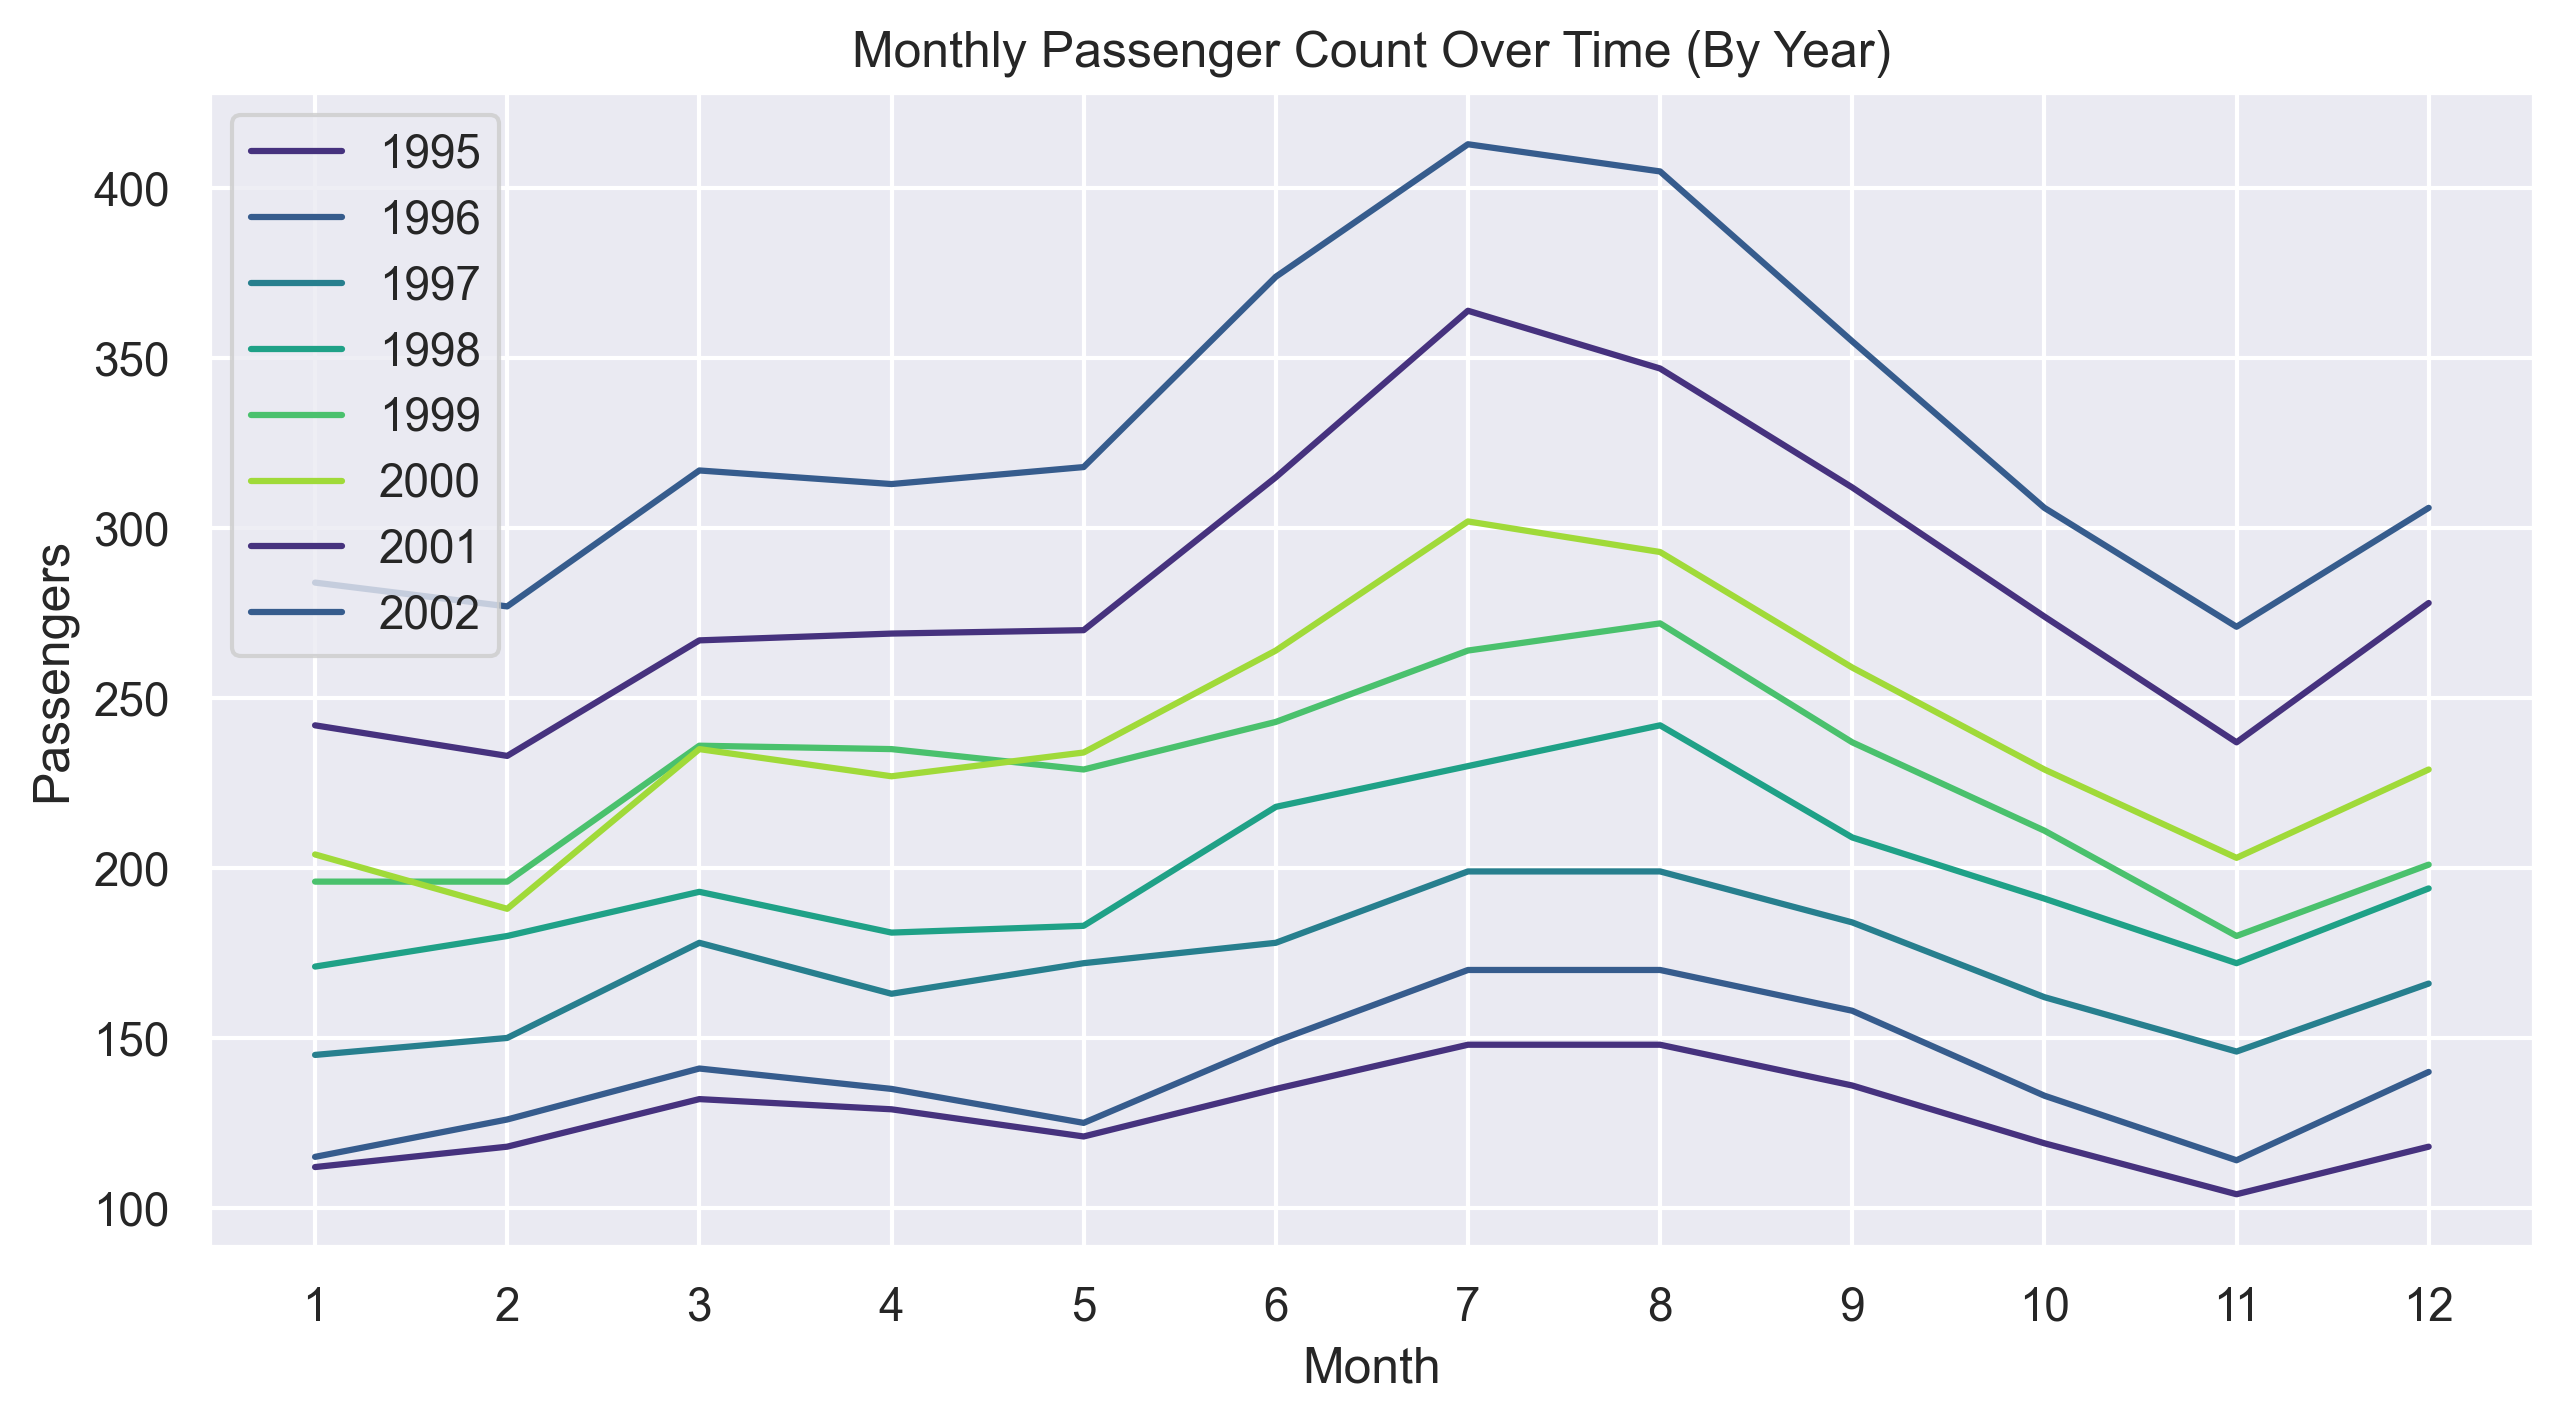

In [9]:


# Convert the "Month" column to datetime objects
series['Month'] = pd.to_datetime(series['Month'])

# Extract the year from the "Month" column
series['Year'] = series['Month'].dt.year

# Group the data by year
yearly_data = series.groupby('Year')

# Plotting the data for each year
for year, data in yearly_data:
    plt.plot(data['Month'].dt.month, data['Passengers'], label=str(year))

# Formatting the plot
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Monthly Passenger Count Over Time (By Year)')

# Rotate x-axis labels for better readability
plt.xticks(range(1, 13))  # Assuming 12 months in a year

# Add a legend
plt.legend()

# Display the plot
plt.show()


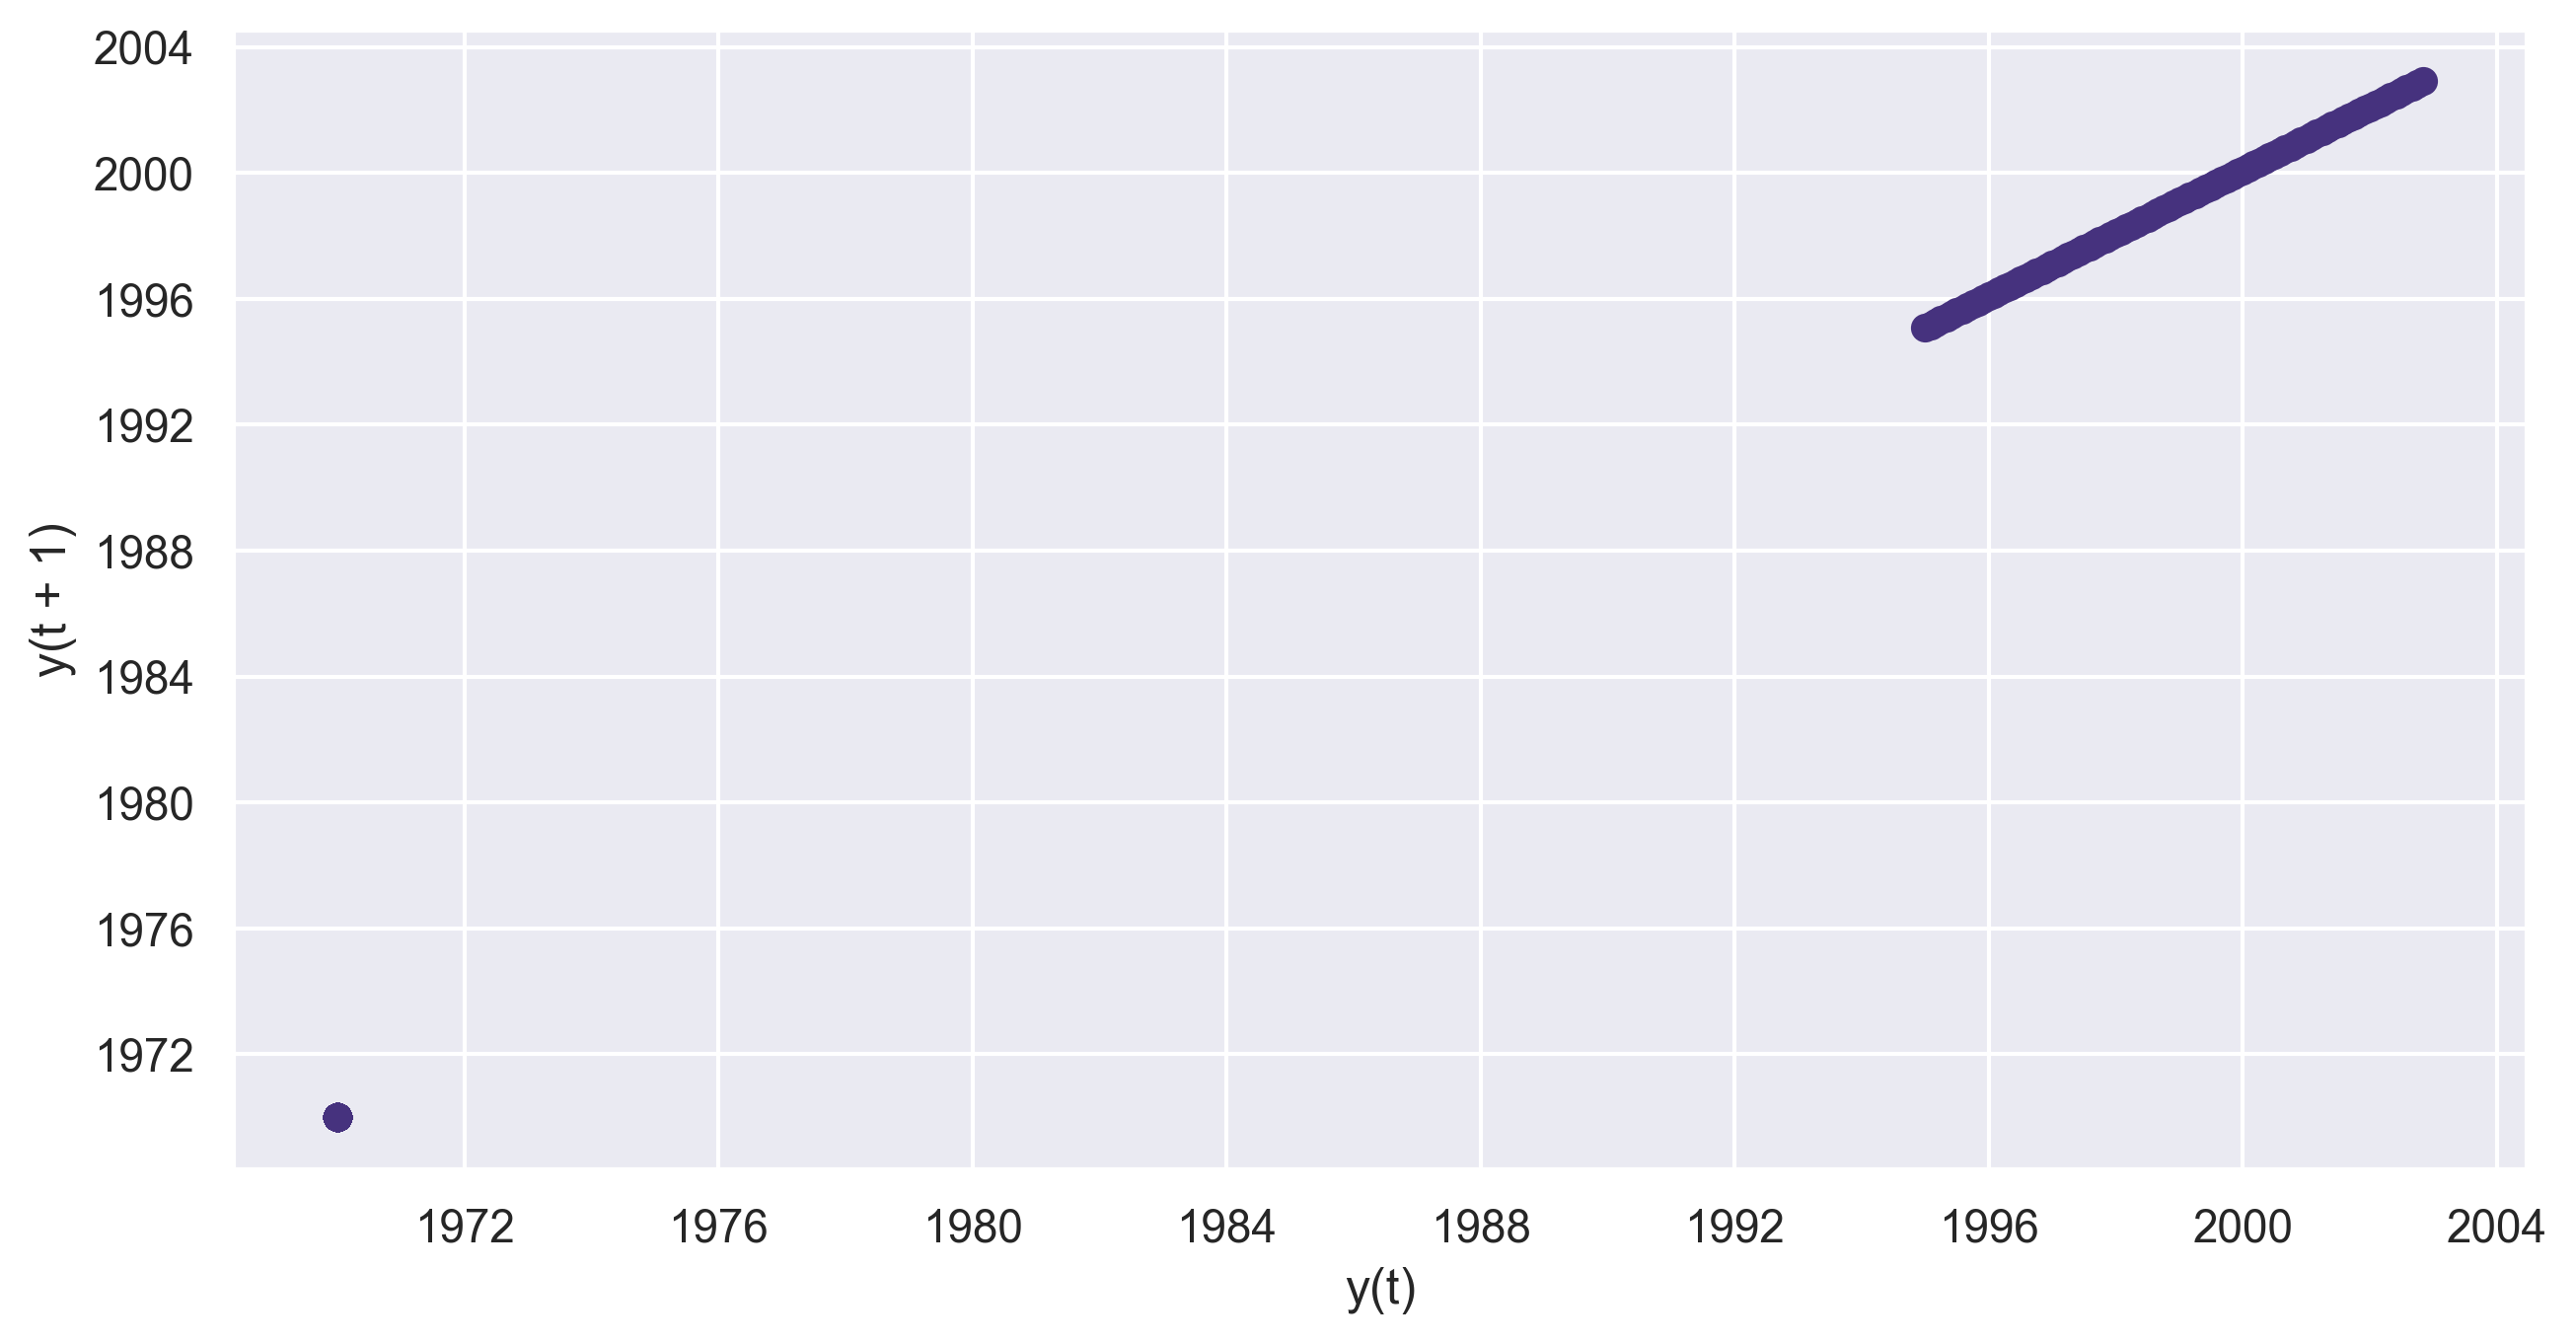

In [10]:
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(series)
plt.show()

In [11]:
series['Month'] = pd.to_datetime(series['Month'], format='%b-%y')


series.set_index('Month', inplace=True)
series

,Passengers,Year
Month,,
1995-01-01,112,1995
1995-02-01,118,1995
1995-03-01,132,1995
1995-04-01,129,1995
1995-05-01,121,1995
...,...,...
2002-08-01,405,2002
2002-09-01,355,2002
2002-10-01,306,2002


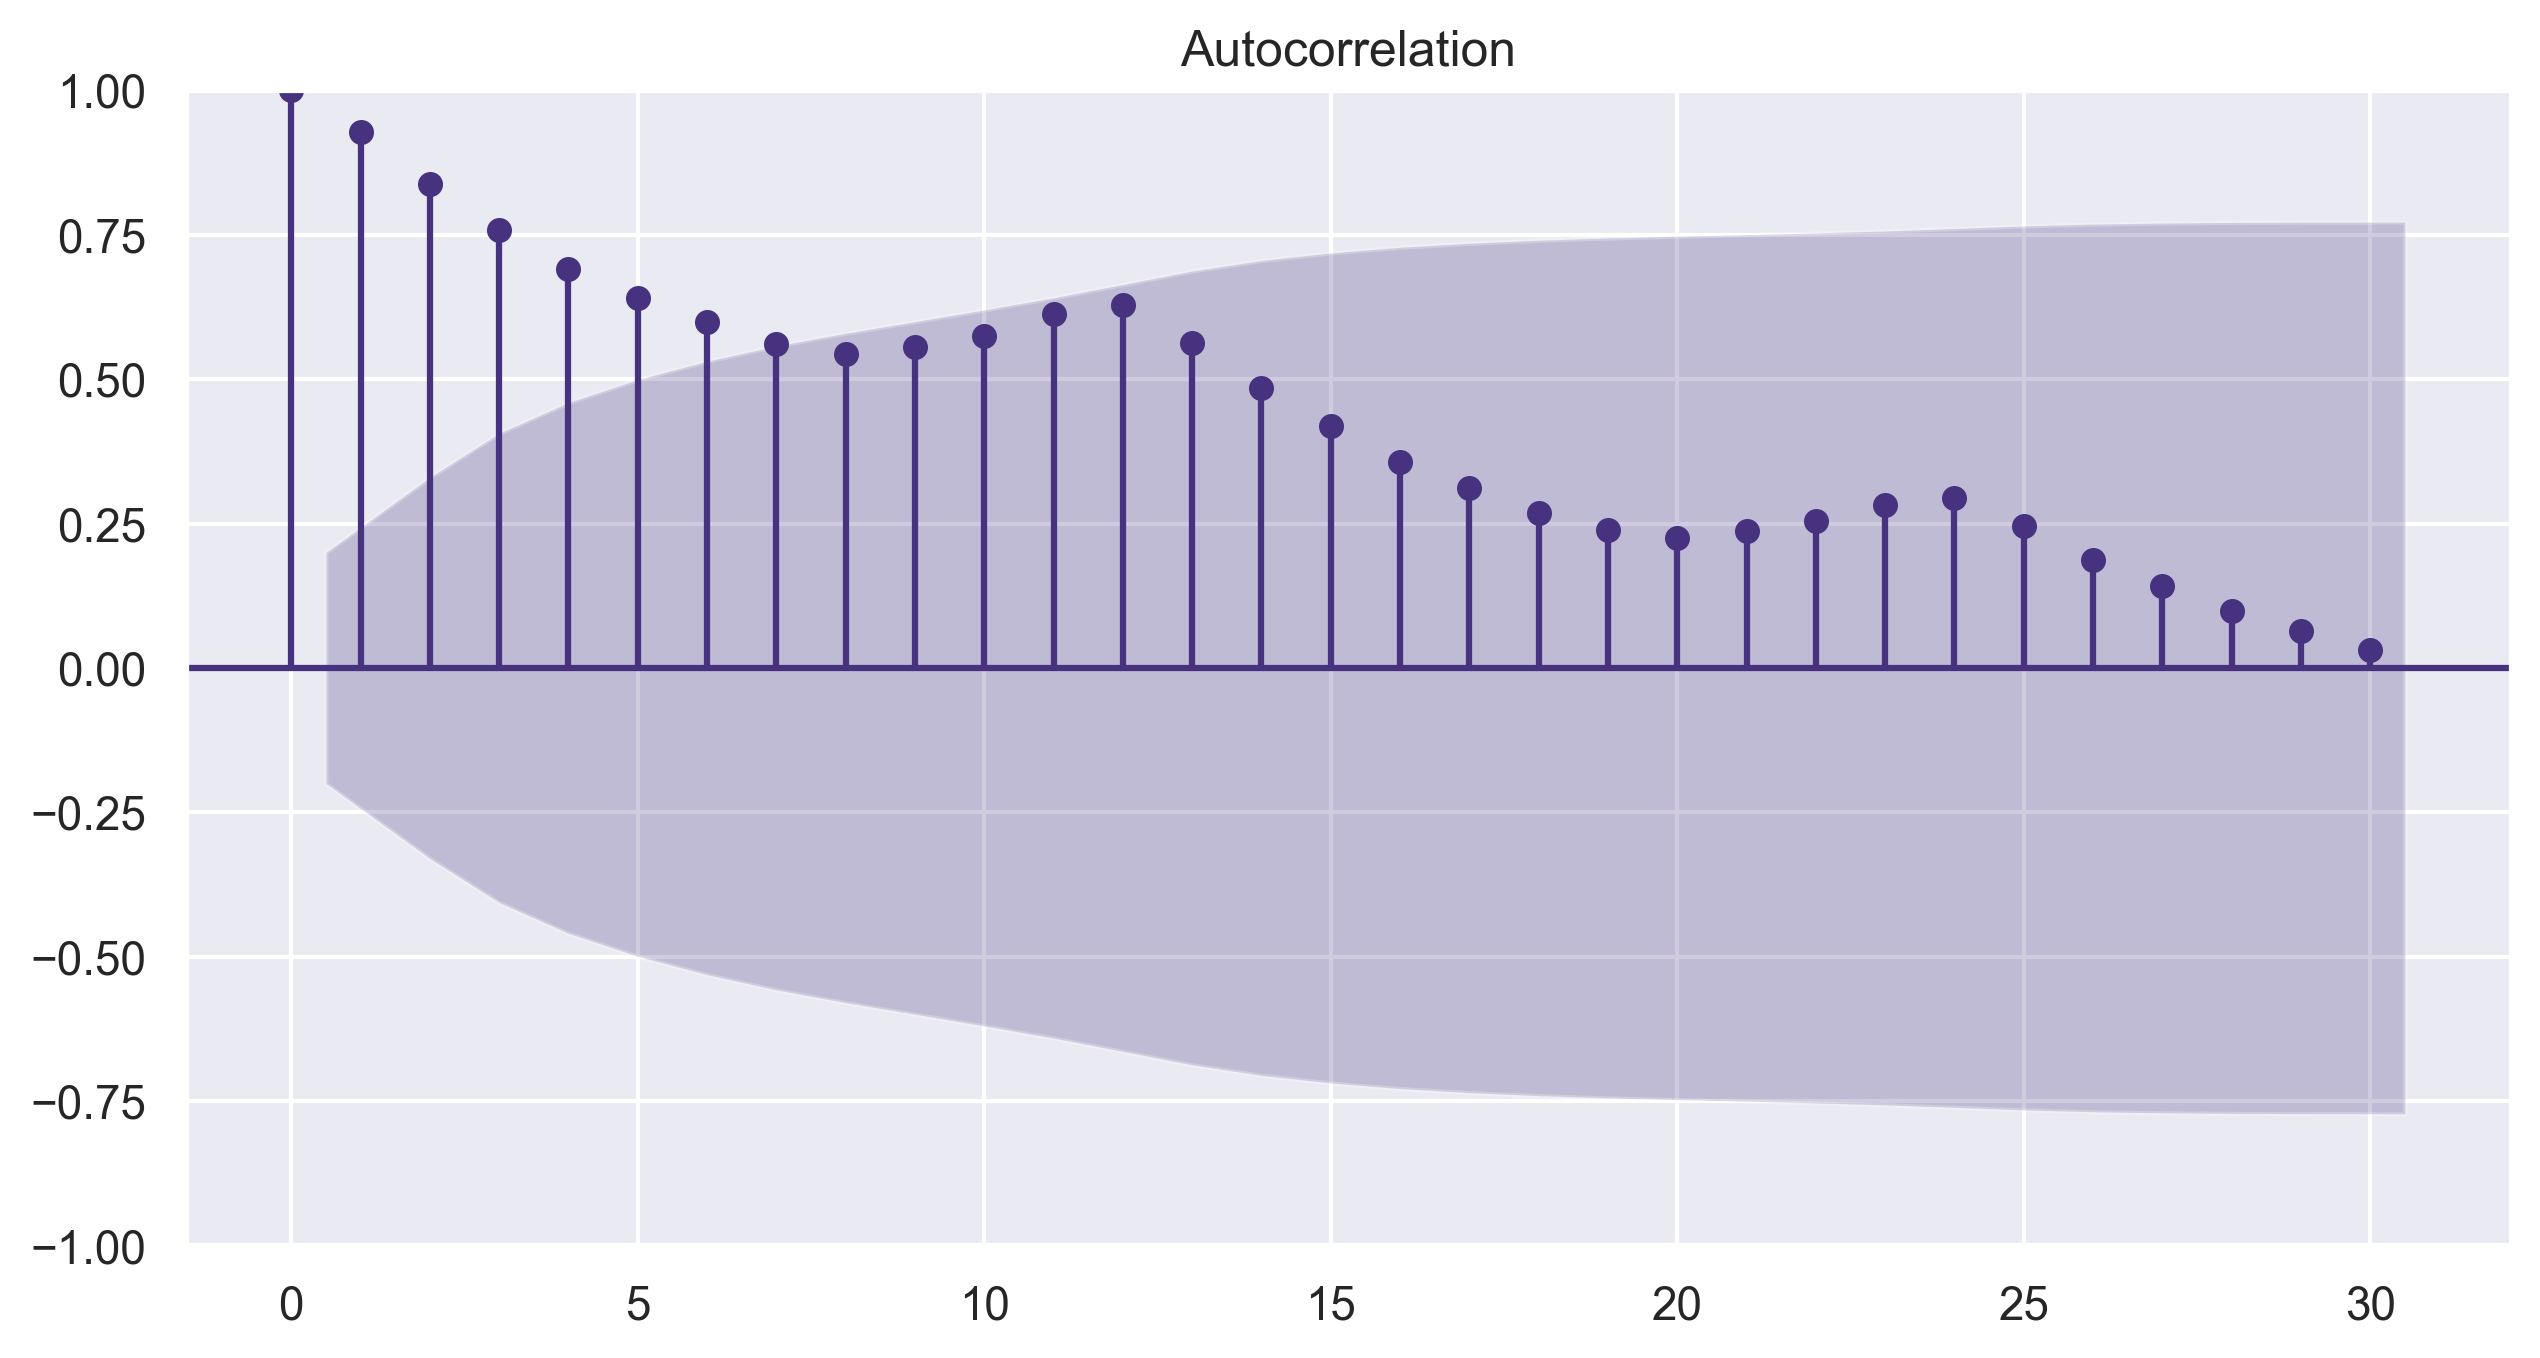

In [12]:
# create an autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf
# Plot the autocorrelation
plot_acf(series['Passengers'], lags=30)
plt.show()

Here we have plotted the lags up to 30 against autocorrelation values there only have positive autocorrelations  0 lag value is always 1 since it is calculation the autocorrelation function woth otseld which will always be 1 .The next laga that we see that are afecting the most on the current data point is the y-1,y-2,y-3 lag. since they are bouncing out of our std error interval.

#Getting data ready wrt the equation variables.we would need t ,t2 ,logy,encoding for the Passengers. Since all the different models require different values.![Equations](forecasting.png)

In [13]:
import numpy as np
df =pd.read_excel('Airlines_Data.xlsx')


# Calculate 't' and 't2' columns
df['t'] = np.arange(1, len(df) + 1)
df['t2'] = df['t'] ** 2

# Calculate 'logy' column (natural logarithm of 'Passengers')
df['log_Passengers'] = np.log(df['Passengers'])





# Convert the "Month" column to datetime objects
df['Month'] = pd.to_datetime(df['Month'])

# Create dummy variables for each month
dummy_months = pd.get_dummies(df['Month'].dt.month, prefix='Month')

# # Convert 'True' and 'False' to 1 and 0
dummy_months = dummy_months.astype(int)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, dummy_months], axis=1)


# Print the updated DataFrame
df.head()

Train = df.head(70)
Test = df.tail(26)
Train.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           70 non-null     datetime64[ns]
 1   Passengers      70 non-null     int64         
 2   t               70 non-null     int32         
 3   t2              70 non-null     int32         
 4   log_Passengers  70 non-null     float64       
 5   Month_1         70 non-null     int32         
 6   Month_2         70 non-null     int32         
 7   Month_3         70 non-null     int32         
 8   Month_4         70 non-null     int32         
 9   Month_5         70 non-null     int32         
 10  Month_6         70 non-null     int32         
 11  Month_7         70 non-null     int32         
 12  Month_8         70 non-null     int32         
 13  Month_9         70 non-null     int32         
 14  Month_10        70 non-null     int32         
 15  Month_11

(96, 17)

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:


#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test["t"])))
rmse_linear = np.sqrt(mean_squared_error(Test['Passengers'], pred_linear))
rmse_linear

48.30985585336206

In [16]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['Passengers'], pred_Exp))
rmse_Exp

298.12659699761343

In [17]:
#Quadratic 

Quad = smf.ols('Passengers~t+t2',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t2"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['Passengers'],pred_Quad))
rmse_Quad

43.89814496742493

In [18]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea))
rmse_add_sea

124.97569951828821

In [19]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t2+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','t','t2']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea_quad))
rmse_add_sea_quad

30.3930428959155

In [20]:
#Multiplicative Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_Mult_add_sea))
rmse_Mult_add_sea 

298.1366141717191

In [21]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,30.393043
2,rmse_Quad,43.898145
0,rmse_linear,48.309856
3,rmse_add_sea,124.975700
1,rmse_Exp,298.126597
5,rmse_Mult_sea,298.136614


# As per the above results from all the mpdels, we can conclude that the best model is Additive Seasonality Quadratic model since it is showing the lowest RMSE value.

# Moving Average

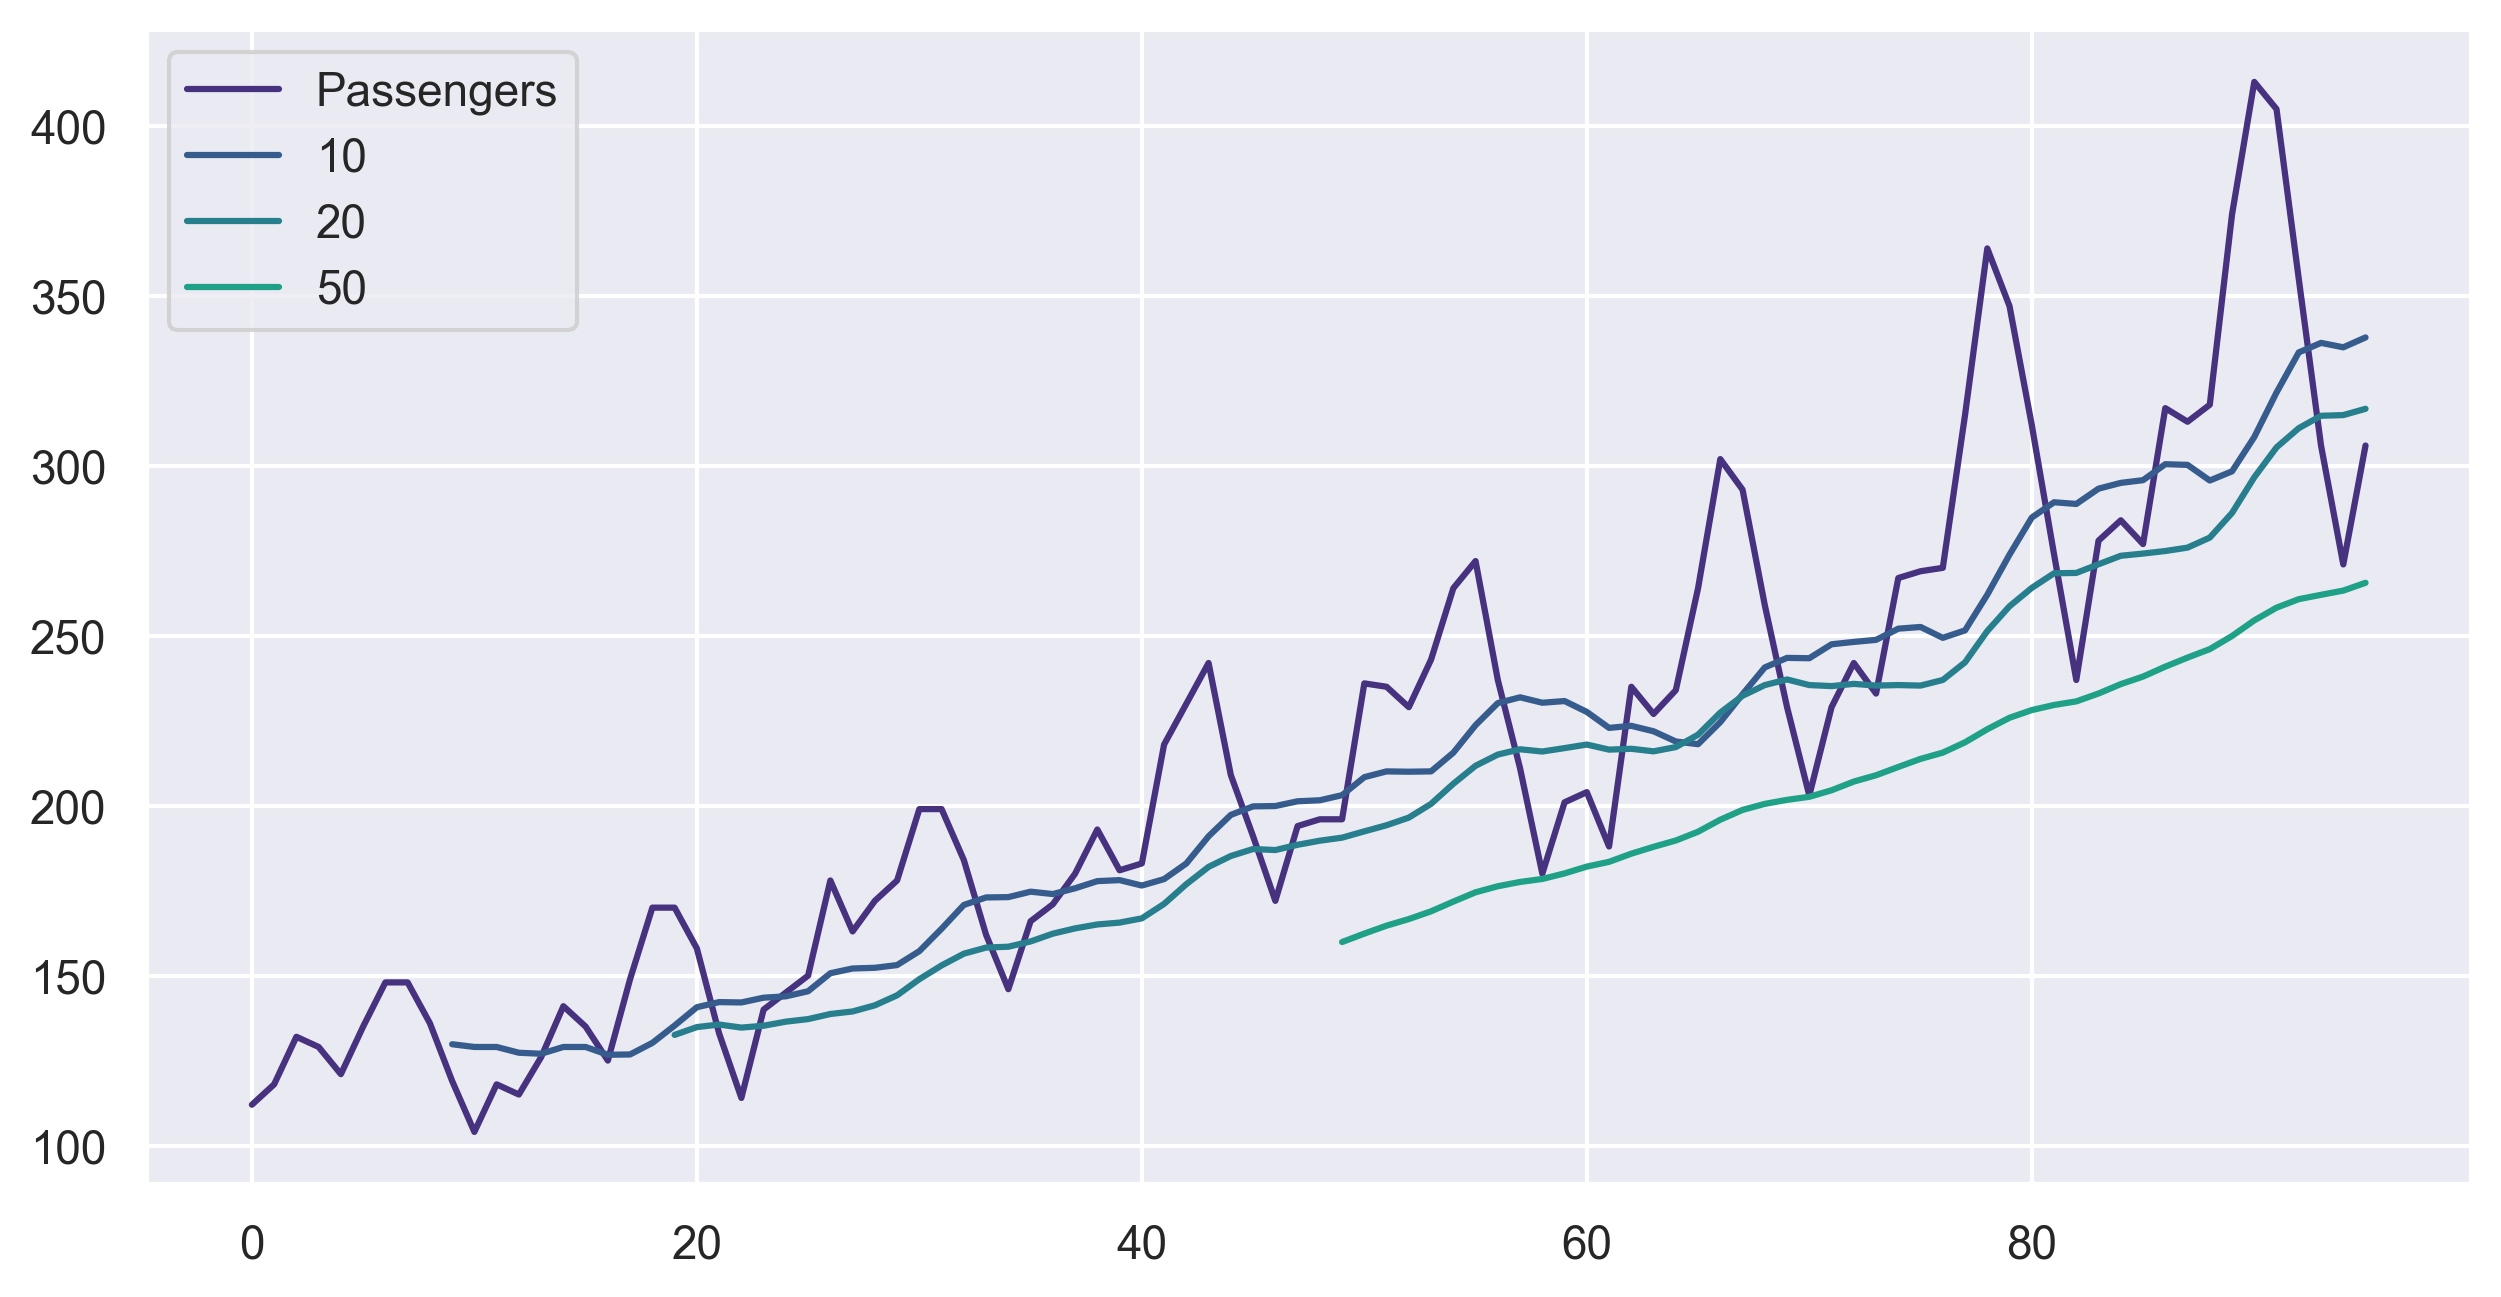

In [22]:
df['Passengers'].plot()
df['Passengers'].rolling(10).mean().plot(label = '10')
df['Passengers'].rolling(20).mean().plot(label = '20')
df['Passengers'].rolling(50).mean().plot(label = 50)
plt.legend()

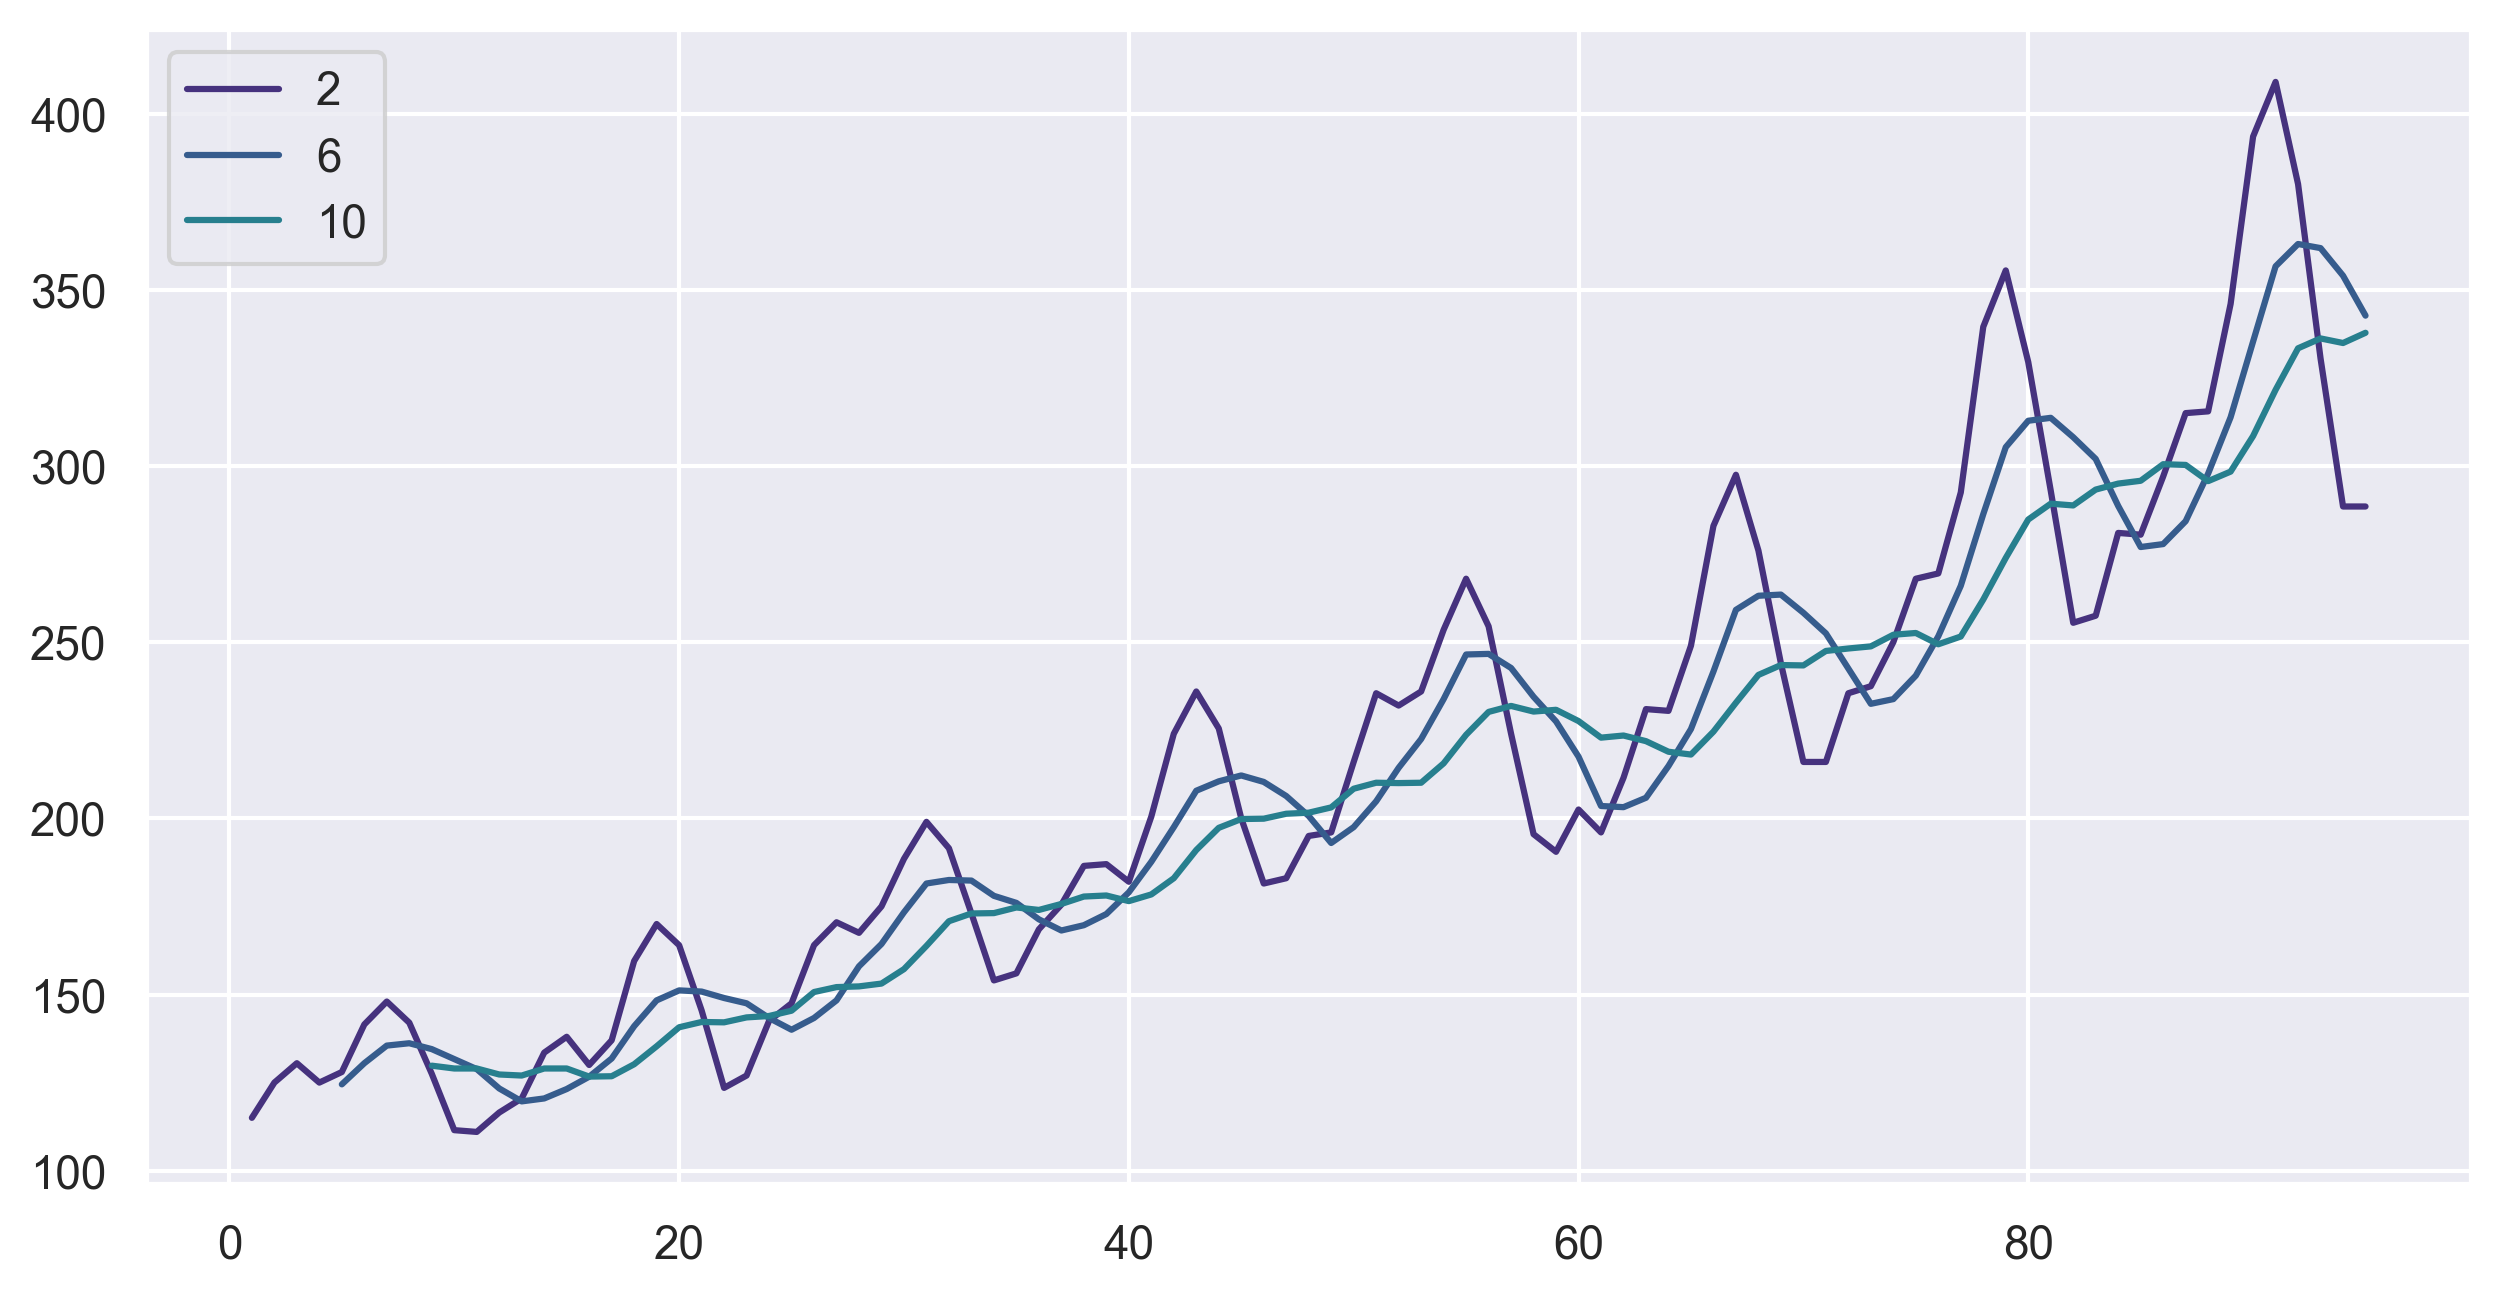

In [23]:
for i in range(2,12,4):
    df['Passengers'].rolling(i).mean().plot(label = str(i))
    plt.legend()